<a href="https://colab.research.google.com/github/angel870326/Monthly-Revenue-Forecasting/blob/main/009_randomforest_xgb_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2023.04.06 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

# **Monthly Revenue Forecasting with Random Forest Regressor & XGB Regressor - Results**

### Contents

##### 1. Input Data
##### 5. Model Training
*  預先訓練多個模型並儲存

##### 7. Predicting Results & Feature Importance
*  Output Functions
*  Random Forest
*  XGB (hyperparameters tuned by 5-fold cross validation)
*  Scores (RMSE, MAPE, MAE, MAE%)

##### 8. Plots
*  Expected v.s. Predicted
*  Scores: RMSE, MAPE, MAE, MAE%
*  Feature Importance

##### 9. Best and Worst Model
*  各模型組合中，預測最好和最差的月份
*  Random Forest 和 XGB 各自預測最好和最差的模型組合 (with Feature Importance)
*  所有模型組合中，預測最好和最差的模型組合 (with Feature Importance)


## **0. Setup**

In [ ]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
!pip install import_ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.7 MB/s eta 0:00:00


In [ ]:
import import_ipynb
%cd '/content/gdrive/Shareddrives/Me/論文/code/Function'

/content/gdrive/MyDrive/論文/code/Function


In [ ]:
from MonRevForecast import predictMonthlyRevenue, BestWorstModel, trainMonthlyRevenue

importing Jupyter notebook from MonRevForecast.ipynb


In [ ]:
from MonRevPlot import plotExpectedPredictedRevenues, plotModelExpectedPredictedRevenues

importing Jupyter notebook from MonRevPlot.ipynb


In [ ]:
from MonRevPlot import plotAllScores, compareModelScore, scoreBoxplotV

In [ ]:
from MonRevPlot import plotFeatureImportance, BestWorstModelFeatureImportancePlot

### **Project Path**

In [ ]:
project_path = '/content/gdrive/Shareddrives/Me/論文'

## **1. Input Data**

【**月營收盈餘 (2015-2022)**】

資料期間：2015年1月至2022年12月（共96個月）

資料範圍：上市、櫃公司（排除金融業、生技醫療、建材營造、DR和KY公司）

資料來源：TEJ Company DB、公開資訊觀測站


In [ ]:
org_data = pd.read_excel(os.path.join(project_path, '資料集/007_v1/201501-202212上市櫃公司月營收_非金融業.xlsx'), index_col=0)
org_data.columns = pd.to_datetime(org_data.columns, format="%Y-%m-%d").to_period('M')
org_data

2015-01  2015-02  2015-03  2015-04  2015-05  2015-06  2015-07  \
公司                                                                        
1101 台泥   8921719  4823318  7695107  8468346  7989971  8545853  8250361   
1102 亞泥   6851825  3279346  5274419  5767824  5623713  5516532  5746639   
1103 嘉泥    310280   160324   200719   273126   320563   143719   175596   
1104 環泥    520536   335531   471332   447811   371720   411286   412816   
1108 幸福    518826   341533   431529   432670   471084   441613   463001   
...           ...      ...      ...      ...      ...      ...      ...   
9951 皇田    284990   251041   279617   333189   321941   300731   289975   
9955 佳龍    301850   131575   325762   152812   262623   193277   102874   
9958 世紀鋼   200493   217812   272212   194423   235272   271207   184345   
9960 邁達康    39703    35428    56154    55879    48415    46872    42649   
9962 有益    187825   140824   225576   203024   218900   146977   186934   

          2015-08  2015-09  2015-10  ...  2022-03  2022-04  2022-05  2022-06  \
公司                                   ...                                       
1101 台泥   7397417  7026214  8081068  ...  9971650  8319342  7733787  9145989   
1102 亞泥   5512417  5546527  5901983  ...  8160414  8710220  8000427  7776413   
1103 嘉泥    184087   189109   321446  ...   220463   168089   163521   183177   
1104 環泥    376087   423675   461991  ...   591593   638493   537082   573028   
1108 幸福    329405   340734   396102  ...   345612   335518   332258   334113   
...           ...      ...      ...  ...      ...      ...      ...      ...   
9951 皇田    300810   347401   333945  ...   374229   302262   323433   371791   
9955 佳龍    172944   172431   177217  ...    96200   101850    95096    80726   
9958 世紀鋼   272110   256634   282106  ...   626104   401960   673479   665459   
9960 邁達康    37345    36845    39898  ...    60275    86754    69752   103280   
9962 有益    145130   128660   119179  ...   366892   248958   228412   387082   

           2022-07   2022-08   2022-09   2022-10  2022-11   2022-12  
公司                                                                   
1101 台泥   10102468  10689860  10404901  11368096  9674576  12584154  
1102 亞泥    7864622   7069221   6994078   7601097  8306062   8340507  
1103 嘉泥     178825    182371    205264    209429   221763    228644  
1104 環泥     580420    605512    597159    634981   631827    725055  
1108 幸福     326691    390053    346635    401202   383773    418326  
...            ...       ...       ...       ...      ...       ...  
9951 皇田     337581    468608    464373    432835   500111    506796  
9955 佳龍      85625     81881     79179     80630    91270     84115  
9958 世紀鋼    651699    757968    903198    911834   944060   1082675  
9960 邁達康     64983    105969    113755     78996    96570     58764  
9962 有益     248327    318092    264270    307426   308663    385673  

[1308 rows x 96 columns]

In [ ]:
print("Data shape:", org_data.shape)
print("Data size:", org_data.size)

Data shape: (1308, 96)
Data size: 125568


## **5. Model Training**

#### **5.1.3 預先訓練多個模型並儲存**

2023.04.06

For XGB grid search. Hyperparameters tuned by 5-fold cross validation.


In [ ]:
# model_save_path = os.path.join(project_path, 'model/xgb')

In [ ]:
# test_y_1 = 2020 
# test_y_2 = 2021
# test_y_3 = 2022
# start_m_1 = 1 
# end_m_1 = 12

2020 (2.6 hr. with GPU)

In [ ]:
# trainMonthlyRevenue(org_data, test_y_1, start_m_1, test_y_1, end_m_1, 'xgb', save_path = model_save_path)

2020-01 model saved. Using time: 784.449  secs.
2020-02 model saved. Using time: 780.385  secs.
2020-03 model saved. Using time: 773.974  secs.
2020-04 model saved. Using time: 764.747  secs.
2020-05 model saved. Using time: 776.558  secs.
2020-06 model saved. Using time: 796.124  secs.
2020-07 model saved. Using time: 784.755  secs.
2020-08 model saved. Using time: 773.230  secs.
2020-09 model saved. Using time: 791.084  secs.
2020-10 model saved. Using time: 788.033  secs.
2020-11 model saved. Using time: 781.614  secs.
2020-12 model saved. Using time: 793.214  secs.


2021 (2.7 hr. with GPU)

In [ ]:
# trainMonthlyRevenue(org_data, test_y_2, start_m_1, test_y_2, end_m_1, 'xgb', save_path = model_save_path)

2021-01 model saved. Using time: 828.266  secs.
2021-02 model saved. Using time: 836.444  secs.
2021-03 model saved. Using time: 806.893  secs.
2021-04 model saved. Using time: 825.926  secs.
2021-05 model saved. Using time: 793.281  secs.
2021-06 model saved. Using time: 795.601  secs.
2021-07 model saved. Using time: 809.412  secs.
2021-08 model saved. Using time: 814.430  secs.
2021-09 model saved. Using time: 800.922  secs.
2021-10 model saved. Using time: 793.870  secs.
2021-11 model saved. Using time: 802.524  secs.
2021-12 model saved. Using time: 805.083  secs.


2022 (2.6 hr. with GPU)

In [ ]:
# trainMonthlyRevenue(org_data, test_y_3, start_m_1, test_y_3, end_m_1, 'xgb', save_path = model_save_path)

2022-01 model saved. Using time: 803.735  secs.
2022-02 model saved. Using time: 813.403  secs.
2022-03 model saved. Using time: 780.769  secs.
2022-04 model saved. Using time: 758.896  secs.
2022-05 model saved. Using time: 756.100  secs.
2022-06 model saved. Using time: 742.213  secs.
2022-07 model saved. Using time: 759.276  secs.
2022-08 model saved. Using time: 753.655  secs.
2022-09 model saved. Using time: 753.544  secs.
2022-10 model saved. Using time: 760.656  secs.
2022-11 model saved. Using time: 767.147  secs.
2022-12 model saved. Using time: 758.302  secs.


## **7. Predicting Results & Feature Importance**


||訓練資料X|訓練資料y|測試資料X|測試資料y|
|---|---|---|---|---|
|Start|2015-01 - 2018-12|2019-01|2016-01 - 2019-12|**2020-01**|
|End|2017-12 - 2021-11|2021-12|2018-12 - 2022-11|**2022-12**|

In [ ]:
# 預測年月
start_y = 2020
start_m = 1
end_y = 2022
end_m = 12

### **7.1 Output Functions**

In [ ]:
# Output data path
output_data_path = '/content/gdrive/Shareddrives/Me/論文/Results'

In [ ]:
# Output (2023.04.04)
def outputPredictingResults(category: str, modelName: str, pred: dict):
    pred['org']['org'].to_excel(os.path.join(output_data_path, f'{category}/org_pred_{modelName}_{category}.xlsx'))
    pred['org']['dec'].to_excel(os.path.join(output_data_path, f'{category}/dec_pred_{modelName}_{category}.xlsx'))
    pred['org']['season'].to_excel(os.path.join(output_data_path, f'{category}/season_pred_{modelName}_{category}.xlsx'))
    pred['def']['org'].to_excel(os.path.join(output_data_path, f'{category}/def_pred_{modelName}_{category}.xlsx'))
    pred['def']['dec'].to_excel(os.path.join(output_data_path, f'{category}/dec_def_pred_{modelName}_{category}.xlsx'))
    pred['def']['season'].to_excel(os.path.join(output_data_path, f'{category}/season_def_pred_{modelName}_{category}.xlsx'))

def outputFeatureImportance(category: str, modelName: str, feature_importance: dict):
    feature_importance['org']['org'].to_excel(os.path.join(output_data_path, f'{category}/org_feature_{modelName}_{category}.xlsx'))
    feature_importance['org']['dec'].to_excel(os.path.join(output_data_path, f'{category}/dec_feature_{modelName}_{category}.xlsx'))
    feature_importance['org']['season'].to_excel(os.path.join(output_data_path, f'{category}/season_feature_{modelName}_{category}.xlsx'))
    feature_importance['def']['org'].to_excel(os.path.join(output_data_path, f'{category}/def_feature_{modelName}_{category}.xlsx'))
    feature_importance['def']['dec'].to_excel(os.path.join(output_data_path, f'{category}/dec_def_feature_{modelName}_{category}.xlsx'))
    feature_importance['def']['season'].to_excel(os.path.join(output_data_path, f'{category}/season_def_feature_{modelName}_{category}.xlsx'))

def outputScores(category: str, modelName: str, scoresD: pd.DataFrame):
    scoresD.to_excel(os.path.join(output_data_path, f'{category}/scores_{modelName}_{category}.xlsx'))

### **7.2 Random Forest**
train + predict

In [ ]:
# Random Forest (22 min)
pred_rf, feature_importance_rf, scores_rf = predictMonthlyRevenue(org_data, start_y, start_m, end_y, end_m, 'rf', search=False)

Using time: 1369.135  secs.


In [ ]:
# Output (2023.04.04)
outputPredictingResults('2015', 'rf', pred_rf)
outputFeatureImportance('2015', 'rf', feature_importance_rf)
outputScores('2015', 'rf', scores_rf)

#### **7.2.1 Predicting Results**

In [ ]:
# Original
print(pred_rf['org']['org'].shape)
print(pred_rf['org']['dec'].shape)
print(pred_rf['org']['season'].shape)
pred_rf['org']['org'].head(4)

(1308, 36)
(1308, 36)
(1308, 36)


2020-01    2020-02    2020-03    2020-04     2020-05    2020-06  \
1101 台泥  9747108.0  6030465.0  8968225.0  9952688.0  10111561.0  9565536.0   
1102 亞泥  7227965.0  4190683.0  6571593.0  5426947.0   7253543.0  7065372.0   
1103 嘉泥   174844.0   109708.0   162984.0   166248.0    175571.0   166806.0   
1104 環泥   453145.0   277366.0   441455.0   419807.0    474476.0   426506.0   

            2020-07     2020-08     2020-09     2020-10  ...    2022-03  \
1101 台泥  10851888.0  10759729.0  10305211.0  10938807.0  ...  8612124.0   
1102 亞泥   7527984.0   7653181.0   8026191.0   7318274.0  ...  7291447.0   
1103 嘉泥    179305.0    181082.0    161218.0    172958.0  ...   183549.0   
1104 環泥    435142.0    459654.0    406975.0    444628.0  ...   558137.0   

           2022-04    2022-05    2022-06    2022-07    2022-08     2022-09  \
1101 台泥  9437651.0  8663931.0  8335483.0  8494923.0  9727148.0  11686979.0   
1102 亞泥  7948699.0  8030614.0  8285324.0  8360442.0  8502336.0   8475866.0   
1103 嘉泥   206409.0   190124.0   175927.0   192686.0   181732.0    187255.0   
1104 環泥   532461.0   642494.0   522001.0   580757.0   572637.0    611302.0   

            2022-10     2022-11     2022-12  
1101 台泥  10309863.0  10687758.0  11785266.0  
1102 亞泥   7785878.0   8517202.0   8781754.0  
1103 嘉泥    188092.0    211804.0    213822.0  
1104 環泥    589018.0    644466.0    622690.0  

[4 rows x 36 columns]

In [ ]:
# Deflating
print(pred_rf['def']['org'].shape)
print(pred_rf['def']['dec'].shape)
print(pred_rf['def']['season'].shape)
pred_rf['def']['org'].head(4)

(1308, 36)
(1308, 36)
(1308, 36)


2020-01    2020-02    2020-03    2020-04     2020-05     2020-06  \
1101 台泥  11038676.0  5491330.0  8968419.0  9484216.0  10821131.0  10033075.0   
1102 亞泥   8039392.0  3328911.0  5889075.0  5733815.0   7192904.0   6961389.0   
1103 嘉泥    171610.0   109789.0   180753.0   171810.0    166210.0    169489.0   
1104 環泥    480192.0   303743.0   412172.0   426733.0    474863.0    403870.0   

            2020-07    2020-08    2020-09     2020-10  ...    2022-03  \
1101 台泥  10642881.0  9446395.0  9329911.0  10340285.0  ...  8909345.0   
1102 亞泥   7363977.0  6561451.0  6227320.0   7233347.0  ...  8176311.0   
1103 嘉泥    166427.0   182737.0   171893.0    166057.0  ...   164501.0   
1104 環泥    426349.0   634270.0   407603.0    460864.0  ...   558002.0   

           2022-04    2022-05    2022-06    2022-07     2022-08     2022-09  \
1101 台泥  9817635.0  8901565.0  8997237.0  8765978.0  10543355.0  11603749.0   
1102 亞泥  8086131.0  8600237.0  8255466.0  7841936.0   8538975.0   7931788.0   
1103 嘉泥   205946.0   177075.0   162083.0   177829.0    183630.0    187464.0   
1104 環泥   558914.0   604898.0   554255.0   579409.0    582256.0    633513.0   

            2022-10     2022-11     2022-12  
1101 台泥  10137556.0  11561923.0  10981000.0  
1102 亞泥   7535752.0   8468222.0   8922322.0  
1103 嘉泥    201647.0    216894.0    219135.0  
1104 環泥    600335.0    644884.0    644423.0  

[4 rows x 36 columns]

#### **7.2.2 Feature Importance**

In [ ]:
print(feature_importance_rf['org']['org'].shape)
print(feature_importance_rf['org']['dec'].shape)
print(feature_importance_rf['org']['season'].shape)
feature_importance_rf['org']['org'].head(4)

(48, 36)
(144, 36)
(48, 36)


2020-01  2020-02  2020-03  2020-04  2020-05  2020-06  2020-07  2020-08  \
t-48   0.0079   0.0190   0.0099   0.0096   0.0100   0.0264   0.0238   0.0200   
t-47   0.0086   0.0124   0.0138   0.0122   0.0085   0.0131   0.0131   0.0094   
t-46   0.0251   0.0233   0.0247   0.0245   0.0281   0.0253   0.0269   0.0255   
t-45   0.0026   0.0023   0.0001   0.0003   0.0031   0.0006   0.0010   0.0003   

      2020-09  2020-10  ...  2022-03  2022-04  2022-05  2022-06  2022-07  \
t-48   0.0307   0.0315  ...   0.0135   0.0098   0.0117   0.0116   0.0088   
t-47   0.0131   0.0101  ...   0.0121   0.0137   0.0112   0.0113   0.0100   
t-46   0.0274   0.0275  ...   0.0255   0.0287   0.0263   0.0246   0.0249   
t-45   0.0027   0.0013  ...   0.0025   0.0001   0.0002   0.0025   0.0003   

      2022-08  2022-09  2022-10  2022-11  2022-12  
t-48   0.0107   0.0100   0.0087   0.0154   0.0175  
t-47   0.0097   0.0104   0.0119   0.0111   0.0114  
t-46   0.0239   0.0255   0.0284   0.0329   0.0284  
t-45   0.0005   0.0017   0.0014   0.0005   0.0010  

[4 rows x 36 columns]

In [ ]:
print(feature_importance_rf['def']['org'].shape)
print(feature_importance_rf['def']['dec'].shape)
print(feature_importance_rf['def']['season'].shape)
feature_importance_rf['def']['org'].head(4)

(48, 36)
(144, 36)
(48, 36)


2020-01  2020-02  2020-03  2020-04  2020-05  2020-06  2020-07  2020-08  \
t-48   0.0102   0.0095   0.0058   0.0045   0.0066   0.0045   0.0047   0.0104   
t-47   0.0073   0.0048   0.0059   0.0075   0.0076   0.0064   0.0046   0.0024   
t-46   0.0050   0.0075   0.0057   0.0049   0.0038   0.0058   0.0037   0.0027   
t-45   0.0103   0.0054   0.0060   0.0056   0.0070   0.0048   0.0071   0.0028   

      2020-09  2020-10  ...  2022-03  2022-04  2022-05  2022-06  2022-07  \
t-48   0.0221   0.0050  ...   0.0088   0.0031   0.0035   0.0039   0.0044   
t-47   0.0049   0.0048  ...   0.0055   0.0053   0.0069   0.0082   0.0036   
t-46   0.0053   0.0074  ...   0.0050   0.0034   0.0033   0.0049   0.0042   
t-45   0.0125   0.0068  ...   0.0047   0.0063   0.0041   0.0076   0.0029   

      2022-08  2022-09  2022-10  2022-11  2022-12  
t-48   0.0053   0.0040   0.0054   0.0058   0.0072  
t-47   0.0046   0.0070   0.0044   0.0047   0.0085  
t-46   0.0040   0.0052   0.0046   0.0044   0.0066  
t-45   0.0044   0.0041   0.0053   0.0062   0.0167  

[4 rows x 36 columns]

### **7.3 XGB**
Hyperparameters tuned by 5-fold cross validation.

In [ ]:
# Load trained models
model_save_path = os.path.join(project_path, 'model/xgb')

In [ ]:
# XGB (5 min. with GPU)
pred_xgb, feature_importance_xgb, scores_xgb = predictMonthlyRevenue(org_data, start_y, start_m, end_y, end_m, 'xgb', search=True, save_path = model_save_path)

Using time: 283.963  secs.


In [ ]:
# Output
outputPredictingResults('2015', 'xgb', pred_xgb)
outputFeatureImportance('2015', 'xgb', feature_importance_xgb)
outputScores('2015', 'xgb', scores_xgb)

#### **7.3.1 Predicting Results**

In [ ]:
print(pred_xgb['org']['org'].shape)
print(pred_xgb['org']['dec'].shape)
print(pred_xgb['org']['season'].shape)
pred_xgb['org']['org'].head(4)

(1308, 36)
(1308, 36)
(1308, 36)


2020-01    2020-02    2020-03     2020-04    2020-05    2020-06  \
1101 台泥  9281427.0  4476182.0  7194266.0  10426581.0  9887841.0  9548404.0   
1102 亞泥  8531245.0  4361130.0  7204394.0   5402046.0  7649148.0  7159885.0   
1103 嘉泥   178689.0   126506.0   180231.0    150281.0   160948.0   156610.0   
1104 環泥   453081.0   257475.0   461059.0    437049.0   475020.0   420684.0   

            2020-07     2020-08     2020-09     2020-10  ...    2022-03  \
1101 台泥  11715238.0  10615142.0  10437627.0  10985125.0  ...  7846001.0   
1102 亞泥   7993881.0   7227075.0   7215058.0   7099456.0  ...  7075819.0   
1103 嘉泥    184164.0    175014.0    154347.0    173416.0  ...   182822.0   
1104 環泥    434377.0    495931.0    418618.0    416851.0  ...   564028.0   

           2022-04    2022-05    2022-06    2022-07    2022-08     2022-09  \
1101 台泥  9135196.0  8825019.0  8166477.0  8085124.0  9983658.0  12186151.0   
1102 亞泥  8068280.0  8109157.0  8044140.0  8254705.0  8598883.0   7804988.0   
1103 嘉泥   222453.0   177734.0   161312.0   190468.0   194500.0    204703.0   
1104 環泥   552832.0   658798.0   490388.0   550280.0   566146.0    629597.0   

            2022-10     2022-11     2022-12  
1101 台泥  10688354.0  10327737.0  10897263.0  
1102 亞泥   7692254.0   8663473.0   8602670.0  
1103 嘉泥    230140.0    246831.0    211531.0  
1104 環泥    631258.0    691505.0    653922.0  

[4 rows x 36 columns]

In [ ]:
print(pred_xgb['def']['org'].shape)
print(pred_xgb['def']['dec'].shape)
print(pred_xgb['def']['season'].shape)
pred_xgb['def']['org'].head(4)

(1308, 36)
(1308, 36)
(1308, 36)


2020-01    2020-02    2020-03    2020-04     2020-05    2020-06  \
1101 台泥  9444674.0  6088301.0  9192255.0  9271703.0  10957328.0  9889081.0   
1102 亞泥  7589389.0  2967151.0  6102889.0  6136435.0   6867991.0  6867141.0   
1103 嘉泥   173546.0   114252.0   172146.0   151906.0    163277.0   168702.0   
1104 環泥   506148.0   279214.0   435680.0   437184.0    454141.0   384790.0   

            2020-07    2020-08    2020-09     2020-10  ...    2022-03  \
1101 台泥  10714853.0  9804992.0  9015910.0  10406968.0  ...  8889798.0   
1102 亞泥   7351346.0  6617492.0  6721627.0   7168334.0  ...  7924479.0   
1103 嘉泥    174306.0   179386.0   188273.0    169757.0  ...   155701.0   
1104 環泥    442843.0   498018.0   416558.0    475053.0  ...   575584.0   

           2022-04    2022-05    2022-06    2022-07    2022-08     2022-09  \
1101 台泥  9372160.0  9016481.0  8327898.0  8427331.0  9750912.0  11369735.0   
1102 亞泥  8591135.0  8630925.0  7967524.0  8082589.0  8578658.0   7753412.0   
1103 嘉泥   213284.0   175992.0   155060.0   182744.0   186715.0    181187.0   
1104 環泥   579831.0   582286.0   552382.0   558747.0   595236.0    615947.0   

           2022-10     2022-11     2022-12  
1101 台泥  9892014.0  11868448.0  11295973.0  
1102 亞泥  7890897.0   8822405.0   8628813.0  
1103 嘉泥   212643.0    224938.0    217561.0  
1104 環泥   594372.0    691916.0    634040.0  

[4 rows x 36 columns]

#### **7.3.2 Feature Importance**

In [ ]:
print(feature_importance_xgb['org']['org'].shape)
print(feature_importance_xgb['org']['dec'].shape)
print(feature_importance_xgb['org']['season'].shape)
feature_importance_xgb['org']['org'].head(4)

(48, 36)
(144, 36)
(48, 36)


2020-01  2020-02  2020-03  2020-04  2020-05  2020-06  2020-07  2020-08  \
t-48   0.3296   0.4131   0.3351   0.1675   0.1696   0.1504   0.2621   0.4846   
t-47   0.0000   0.0002   0.0018   0.0000   0.0001   0.0001   0.2026   0.0000   
t-46   0.1226   0.0058   0.0000   0.0005   0.4375   0.4568   0.0002   0.0000   
t-45   0.0000   0.0000   0.0461   0.0000   0.0012   0.0000   0.0000   0.0000   

      2020-09  2020-10  ...  2022-03  2022-04  2022-05  2022-06  2022-07  \
t-48   0.5592   0.4759  ...   0.0959   0.3282   0.0453   0.0165   0.1123   
t-47   0.0018   0.0000  ...   0.0000   0.1919   0.0000   0.0000   0.2533   
t-46   0.0000   0.0000  ...   0.0000   0.0000   0.0000   0.1609   0.0000   
t-45   0.0000   0.0000  ...   0.2854   0.0000   0.5535   0.0000   0.0000   

      2022-08  2022-09  2022-10  2022-11  2022-12  
t-48   0.0560   0.0895   0.0979   0.2247   0.2494  
t-47   0.0028   0.0000   0.3167   0.2259   0.0224  
t-46   0.0000   0.0000   0.0769   0.0000   0.0000  
t-45   0.0000   0.1523   0.0000   0.0000   0.2897  

[4 rows x 36 columns]

In [ ]:
print(feature_importance_xgb['def']['org'].shape)
print(feature_importance_xgb['def']['dec'].shape)
print(feature_importance_xgb['def']['season'].shape)
feature_importance_xgb['def']['org'].head(4)

(48, 36)
(144, 36)
(48, 36)


2020-01  2020-02  2020-03  2020-04  2020-05  2020-06  2020-07  2020-08  \
t-48   0.0067   0.0038   0.0038   0.0025   0.0169   0.0083   0.0024   0.0030   
t-47   0.0101   0.0025   0.0039   0.0068   0.0065   0.0052   0.0033   0.0026   
t-46   0.0039   0.0069   0.0055   0.0069   0.0063   0.0060   0.0027   0.0025   
t-45   0.0066   0.0074   0.0075   0.0053   0.0111   0.0080   0.0085   0.0022   

      2020-09  2020-10  ...  2022-03  2022-04  2022-05  2022-06  2022-07  \
t-48   0.0103   0.0084  ...   0.0032   0.0062   0.0026   0.0026   0.0031   
t-47   0.0037   0.0122  ...   0.0018   0.0063   0.0084   0.0045   0.0034   
t-46   0.0071   0.0060  ...   0.0043   0.0055   0.0046   0.0044   0.0056   
t-45   0.0093   0.0079  ...   0.0037   0.0112   0.0082   0.0058   0.0049   

      2022-08  2022-09  2022-10  2022-11  2022-12  
t-48   0.0152   0.0023   0.0025   0.0032   0.0037  
t-47   0.0040   0.0097   0.0033   0.0034   0.0067  
t-46   0.0024   0.0055   0.0091   0.0049   0.0058  
t-45   0.0048   0.0067   0.0070   0.0058   0.0232  

[4 rows x 36 columns]

### **7.4 Scores**

In [ ]:
# Random Forest
scores_rf

RMSE-org   MAE-org  MAE%-org  MAPE-org   RMSE-def   MAE-def  \
2020-01   2298280.0  309553.0    0.1873    0.3966  3818107.0  372146.0   
2020-02   1489037.0  245976.0    0.1879    0.5491  2257473.0  250962.0   
2020-03   2718929.0  291803.0    0.1667    0.3793  1598355.0  228240.0   
2020-04   3280400.0  305551.0    0.1763    0.4155  1097714.0  210075.0   
2020-05   3398784.0  274102.0    0.1560    1.3348   764294.0  161671.0   
2020-06   2782547.0  277171.0    0.1507    0.2250  1611130.0  193734.0   
2020-07   3628401.0  307549.0    0.1608    0.2895   669454.0  146703.0   
2020-08   3990666.0  307913.0    0.1588    5.5732   930012.0  156170.0   
2020-09   2091005.0  270574.0    0.1284    0.4662  1031406.0  188662.0   
2020-10   5582113.0  346276.0    0.1612    0.3685  3584462.0  252340.0   
2020-11   7436449.0  427736.0    0.1848    0.4966  4315901.0  289908.0   
2020-12   9435621.0  514730.0    0.2177    0.4672  3307994.0  274234.0   
2021-01   6802517.0  540161.0    0.2558    0.4150  3367743.0  433313.0   
2021-02   6724633.0  461635.0    0.2674    0.5272  1514639.0  228596.0   
2021-03   5433230.0  464674.0    0.2146    4.5240  1517377.0  262355.0   
2021-04   6430221.0  430779.0    0.2009    0.1799  1229875.0  192550.0   
2021-05   5084644.0  408597.0    0.1929    0.2522   708651.0  152339.0   
2021-06   4128668.0  364578.0    0.1686    0.7621  3106667.0  251951.0   
2021-07   3786061.0  317963.0    0.1462    0.3311  1008394.0  190885.0   
2021-08   3083746.0  303528.0    0.1377    0.1992  1525400.0  188375.0   
2021-09   7177233.0  457370.0    0.1845    0.2731  2975683.0  293128.0   
2021-10   3661343.0  310628.0    0.1299    0.1943   743999.0  161483.0   
2021-11   4200050.0  351294.0    0.1356    0.1834  1319427.0  195715.0   
2021-12   6570265.0  474493.0    0.1749    0.2571  1122230.0  202282.0   
2022-01   3428619.0  371810.0    0.1578    0.3948  4874621.0  406002.0   
2022-02   5195031.0  393882.0    0.1919    0.3499  2499249.0  229634.0   
2022-03   5686548.0  415603.0    0.1636    0.2157  1087738.0  207347.0   
2022-04   4656061.0  459109.0    0.2066    0.2904  2267586.0  326683.0   
2022-05   5569983.0  400834.0    0.1699    0.2226   903360.0  174784.0   
2022-06   6723649.0  473789.0    0.1849    0.4295  1795169.0  268370.0   
2022-07   5454712.0  442529.0    0.1861    0.2861  1482254.0  251787.0   
2022-08   5275681.0  426016.0    0.1773    0.2332  1877384.0  237911.0   
2022-09  11391017.0  579078.0    0.2109    0.2547  7973844.0  419730.0   
2022-10  10973693.0  575220.0    0.2223    0.2777  5007339.0  338589.0   
2022-11   4341490.0  505655.0    0.2122    0.2376  7619421.0  479065.0   
2022-12   4469999.0  523193.0    0.2178    0.3036  1852897.0  324687.0   

         MAE%-def  MAPE-def    RMSE-dec   MAE-dec  ...  MAE%-dec_def  \
2020-01    0.2251    0.3797   3451173.0  335016.0  ...        0.1873   
2020-02    0.1917    0.3790   1825518.0  272744.0  ...        0.1926   
2020-03    0.1304    0.3658   3280356.0  306344.0  ...        0.1227   
2020-04    0.1212    0.4461   4139463.0  338928.0  ...        0.1282   
2020-05    0.0920    1.4595   4271341.0  309875.0  ...        0.1041   
2020-06    0.1053    0.1932   3644225.0  303156.0  ...        0.1012   
2020-07    0.0767    0.2832   4536004.0  346471.0  ...        0.0784   
2020-08    0.0805    0.2276   5228006.0  362276.0  ...        0.0940   
2020-09    0.0895    0.2695   3491286.0  336198.0  ...        0.1015   
2020-10    0.1175    0.3229   7420968.0  408106.0  ...        0.1058   
2020-11    0.1253    0.2241   9402726.0  504591.0  ...        0.1421   
2020-12    0.1160    0.2408  10598487.0  566968.0  ...        0.1283   
2021-01    0.2052    0.3381   7913477.0  595511.0  ...        0.2113   
2021-02    0.1324    1.2685   7532315.0  501508.0  ...        0.1922   
2021-03    0.1212    3.6161   6211915.0  505036.0  ...        0.1640   
2021-04    0.0898    0.2145   7423802.0  491125.0  ...        0.1028   
2021-05    0.0719    0.2311   6066962.0  484749.

In [ ]:
# XGB
scores_xgb

RMSE-org   MAE-org  MAE%-org  MAPE-org   RMSE-def   MAE-def  \
2020-01  1909268.0  302341.0    0.1829    0.4521  3367923.0  349380.0   
2020-02  1931802.0  268546.0    0.2051    0.4673  1792110.0  237513.0   
2020-03  1516602.0  248673.0    0.1421    0.3960  1281614.0  212395.0   
2020-04  1318789.0  236065.0    0.1362    0.6511  1170199.0  219842.0   
2020-05  1321821.0  206520.0    0.1175    2.8943   990802.0  186321.0   
2020-06  1827900.0  250611.0    0.1362    0.3314  1058607.0  166356.0   
2020-07  1293005.0  219542.0    0.1148    0.5540   830853.0  161908.0   
2020-08  1272005.0  208767.0    0.1077    5.9767  1110768.0  171226.0   
2020-09  3666698.0  330903.0    0.1571   18.6158   758137.0  174340.0   
2020-10  1242925.0  206990.0    0.0963    2.0635  3940752.0  268314.0   
2020-11  2640157.0  283638.0    0.1225    0.4637  3489813.0  270573.0   
2020-12  5332637.0  439939.0    0.1861    0.5074  4141458.0  277988.0   
2021-01  4197038.0  500086.0    0.2368    0.8627  3917731.0  454541.0   
2021-02  5393747.0  456454.0    0.2644    0.3583  1658769.0  243251.0   
2021-03  3180205.0  421501.0    0.1947   18.1383  1710275.0  273821.0   
2021-04  3657367.0  402212.0    0.1876    0.2380  1300855.0  197186.0   
2021-05  2571767.0  346932.0    0.1637    0.2792  1354505.0  193415.0   
2021-06  2177249.0  319894.0    0.1479    0.8350  3244523.0  259186.0   
2021-07  1755828.0  271329.0    0.1247    0.4171  1461566.0  228659.0   
2021-08  1926222.0  275838.0    0.1251    0.3498  1792751.0  197103.0   
2021-09  3831156.0  364347.0    0.1470    0.5725  2031643.0  258772.0   
2021-10  2365915.0  307524.0    0.1286    0.3966  1577456.0  226652.0   
2021-11  2205170.0  300156.0    0.1159    0.3886  1227157.0  193264.0   
2021-12  1564616.0  302969.0    0.1117    0.3250   744303.0  173546.0   
2022-01  2349346.0  336835.0    0.1430    0.5617  3660193.0  342993.0   
2022-02  2529555.0  324748.0    0.1582    0.3934  3884162.0  267909.0   
2022-03  2848698.0  357072.0    0.1405    0.3979  1054175.0  206328.0   
2022-04  2897090.0  377799.0    0.1700    0.4112  2403765.0  348744.0   
2022-05  3300181.0  363999.0    0.1543    0.2499   732436.0  168358.0   
2022-06  4973947.0  496099.0    0.1936    0.8951  2062407.0  300491.0   
2022-07  2979485.0  369359.0    0.1554    0.3334  1471281.0  244837.0   
2022-08  3913766.0  385548.0    0.1605    0.5347  1395197.0  209064.0   
2022-09  6875248.0  485552.0    0.1768    0.2754  6853604.0  396485.0   
2022-10  6674510.0  464794.0    0.1797    0.3184  5631916.0  346227.0   
2022-11  3611904.0  465631.0    0.1954    0.2783  6093612.0  423932.0   
2022-12  3773638.0  498294.0    0.2075    0.4611  2333492.0  347705.0   

         MAE%-def  MAPE-def   RMSE-dec   MAE-dec  ...  MAE%-dec_def  \
2020-01    0.2114    0.3946  1945789.0  309946.0  ...        0.1698   
2020-02    0.1814    0.4258  1880839.0  267425.0  ...        0.1837   
2020-03    0.1214    0.3492  1601154.0  244042.0  ...        0.1263   
2020-04    0.1269    0.4610  1616354.0  265111.0  ...        0.1347   
2020-05    0.1060    1.7199  1374785.0  223649.0  ...        0.1050   
2020-06    0.0904    0.2206  1814585.0  249541.0  ...        0.0871   
2020-07    0.0846    0.2999  1374023.0  230130.0  ...        0.0820   
2020-08    0.0883    0.2180  1294712.0  209760.0  ...        0.0864   
2020-09    0.0827    0.2439  3890621.0  369558.0  ...        0.1010   
2020-10    0.1249    0.3571  2020255.0  254929.0  ...        0.1229   
2020-11    0.1169    0.3392  2938659.0  329308.0  ...        0.1384   
2020-12    0.1176    0.3232  5082546.0  403887.0  ...        0.1233   
2021-01    0.2153    0.3469  4165281.0  494833.0  ...        0.2230   
2021-02    0.1409    1.2577  5449098.0  474438.0  ...        0.1819   
2021-03    0.1265    7.5294  3371800.0  451062.0  ...        0.1532   
2021-04    0.0920    0.2241  3685602.0  422087.0  ...        0.1309   
2021-05    0.0913    0.2308  2825537.0  431804.0  ...        0.0843   
2021-06    0.1199    0.7018  2

## **8. Plots**

y_train = y_test 往前推 12 個月

### **8.1 Expected v.s. Predicted**

#### **8.1.1 All**

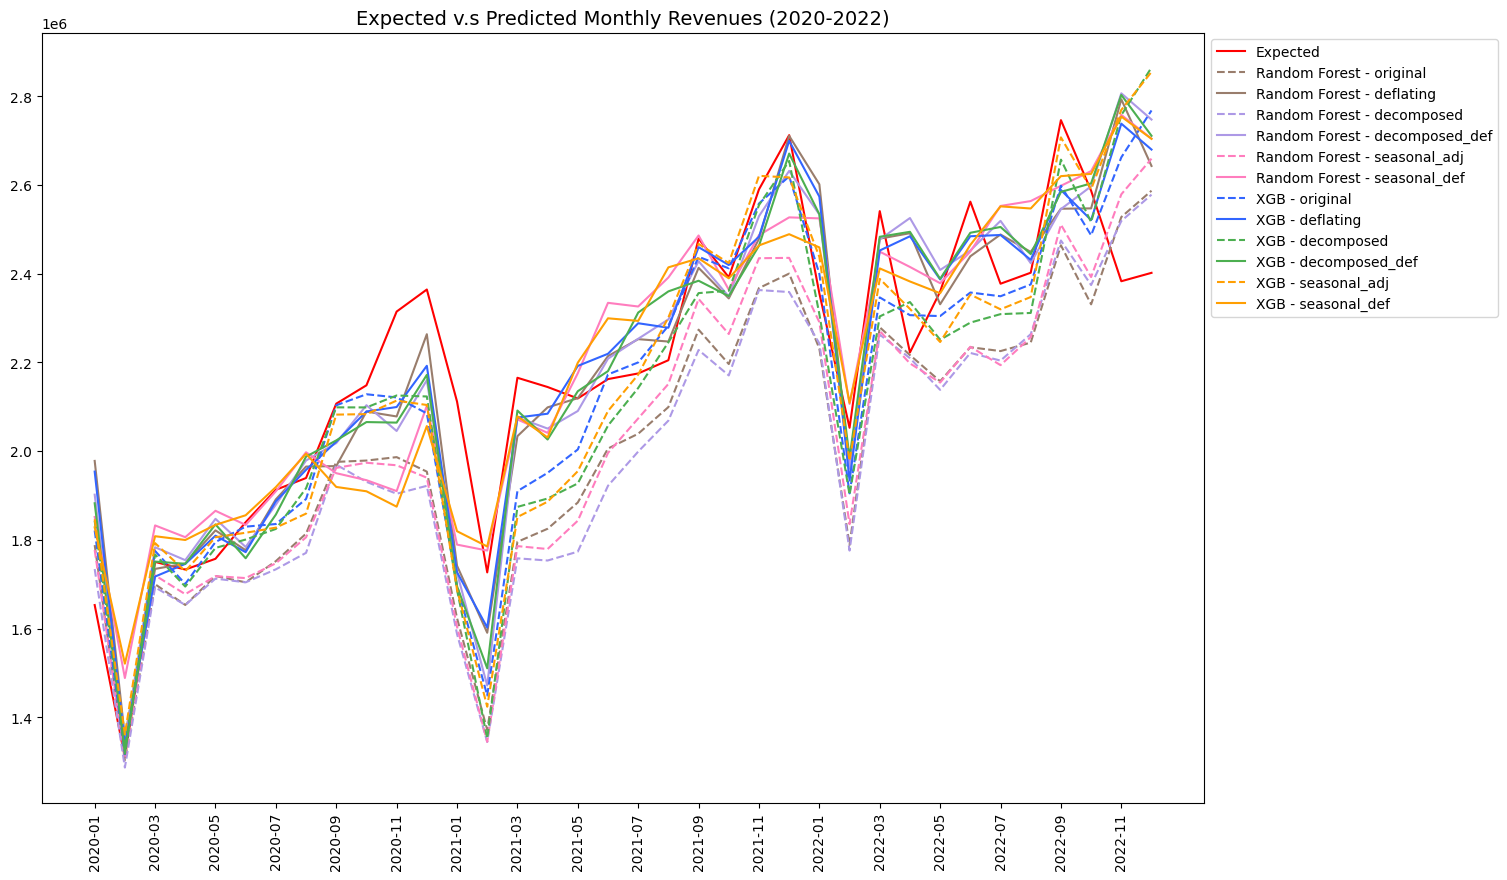

In [ ]:
plotExpectedPredictedRevenues(org_data, pred_rf, pred_xgb, start_y)
# plotExpectedPredictedRevenues(org_data, org_pred_rf, def_pred_rf, dec_pred_rf, dec_def_pred_rf, season_pred_rf, season_def_pred_rf, org_pred_xgb, def_pred_xgb, dec_pred_xgb, dec_def_pred_xgb, season_pred_xgb, season_def_pred_xgb, start_y)

#### **8.1.2 分模型畫圖**

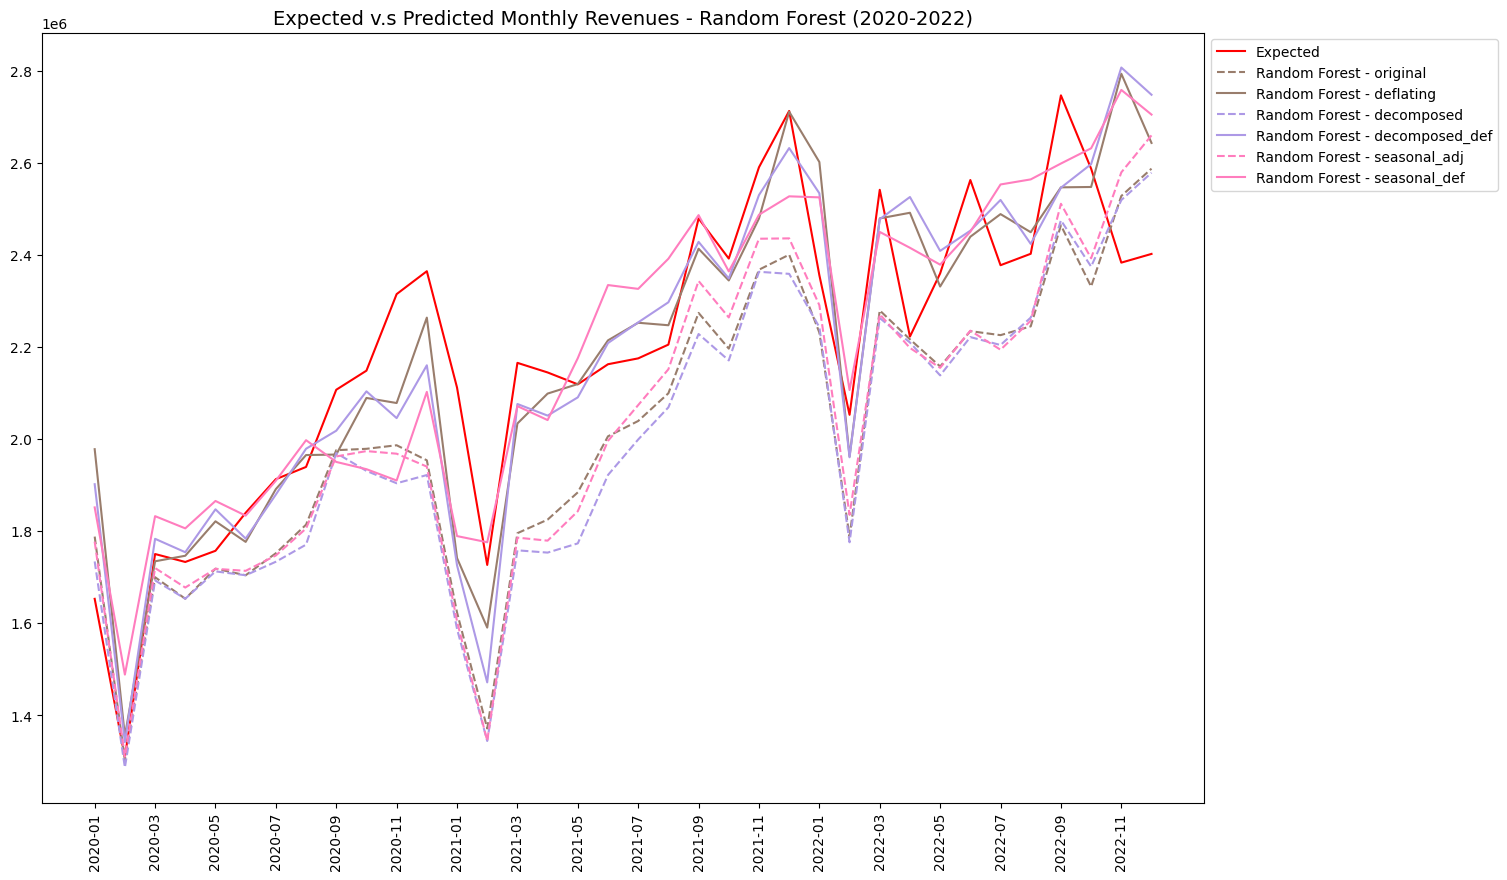

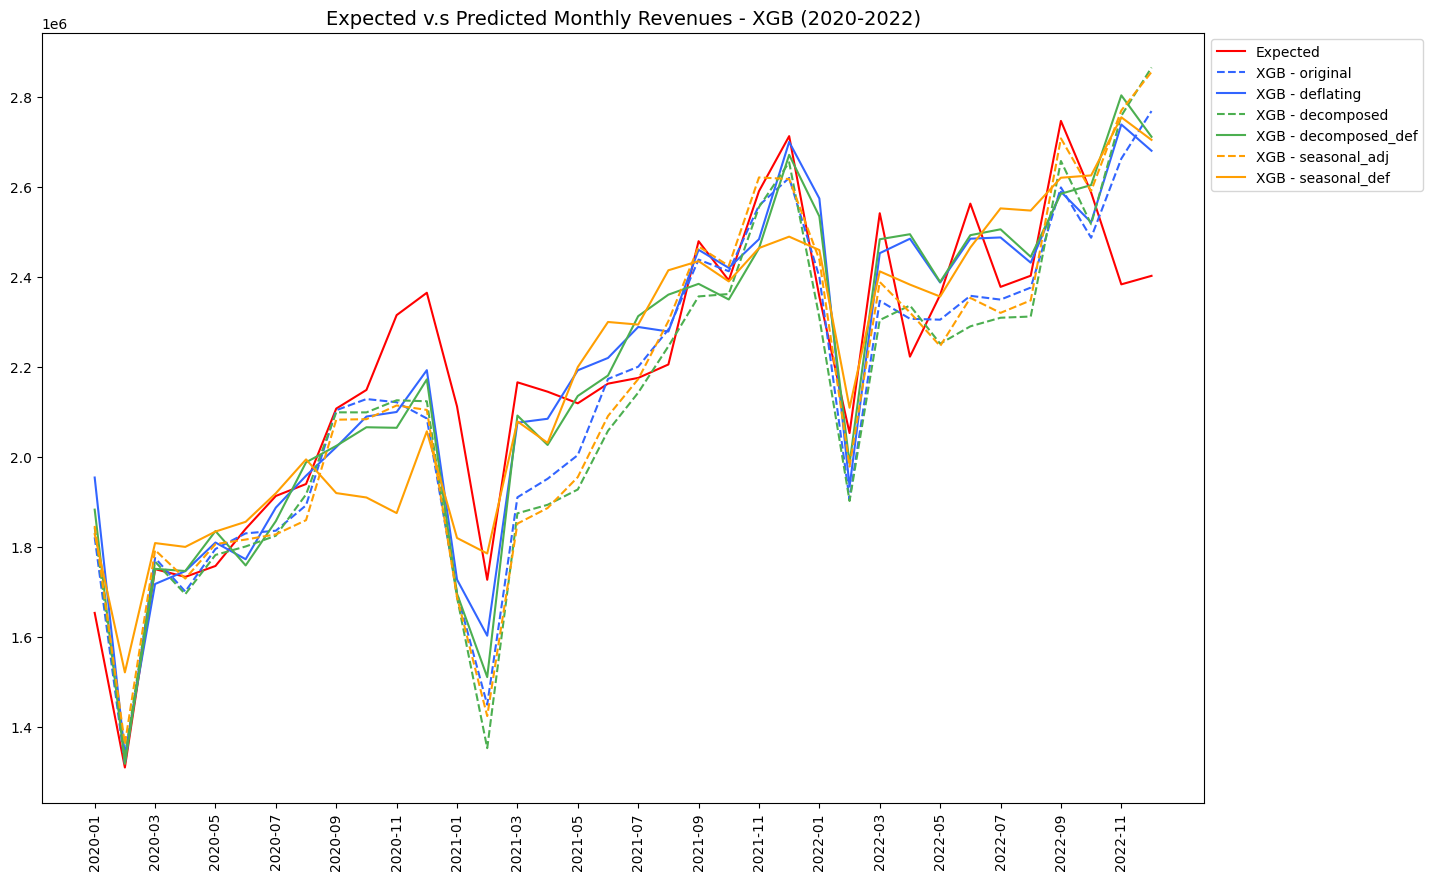

In [ ]:
plotModelExpectedPredictedRevenues(org_data, pred_rf, 'rf', start_y)
plotModelExpectedPredictedRevenues(org_data, pred_xgb, 'xgb', start_y)
# plotModelExpectedPredictedRevenues(org_data, org_pred_rf, def_pred_rf, dec_pred_rf, dec_def_pred_rf, season_pred_rf, season_def_pred_rf, 'rf', start_y)
# plotModelExpectedPredictedRevenues(org_data, org_pred_xgb, def_pred_xgb, dec_pred_xgb, dec_def_pred_xgb, season_pred_xgb, season_def_pred_xgb, 'xgb', start_y)

### **8.2 Scores: RMSE, MAPE, MAE, MAE%**

*   RMSE (Root Mean Square Error)

  $RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n(\hat{y}_i - y_i)^2}$

<br>

*   MAE (Mean Absolute Error)

  $MAE = \frac{1}{n}\sum_{i=1}^n|\hat{y}_i - y_i|$

<br>

*   MAE% (MAE / mean of the sum of y_true)

  $MAE\% = \frac{\frac{1}{n}\sum_{i=1}^n|\hat{y}_i - y_i|}{\frac{1}{n}\sum_{i=1}^n y_i} = \frac{\sum_{i=1}^n|\hat{y}_i - y_i|}{\sum_{i=1}^n y_i}$

<br>

*   MAPE (Mean Absolute Percentage Error)

  $MAPE(\%) = \frac{1}{n}\sum_{i=1}^n \frac{|\hat{y}_i - y_i|}{y_i}$


#### **8.2.1 Plot All Scores**

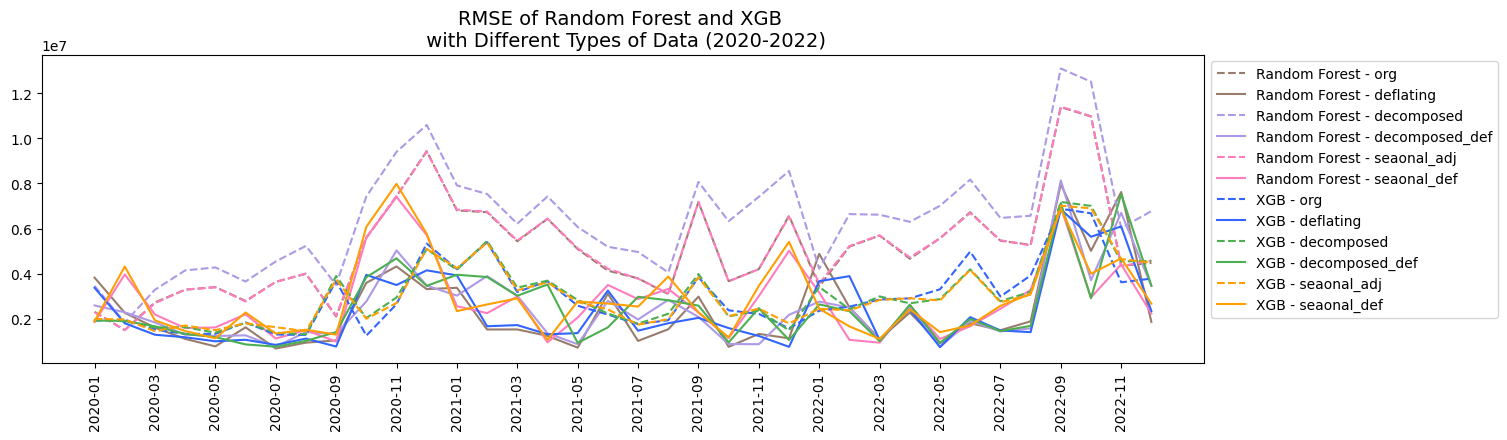

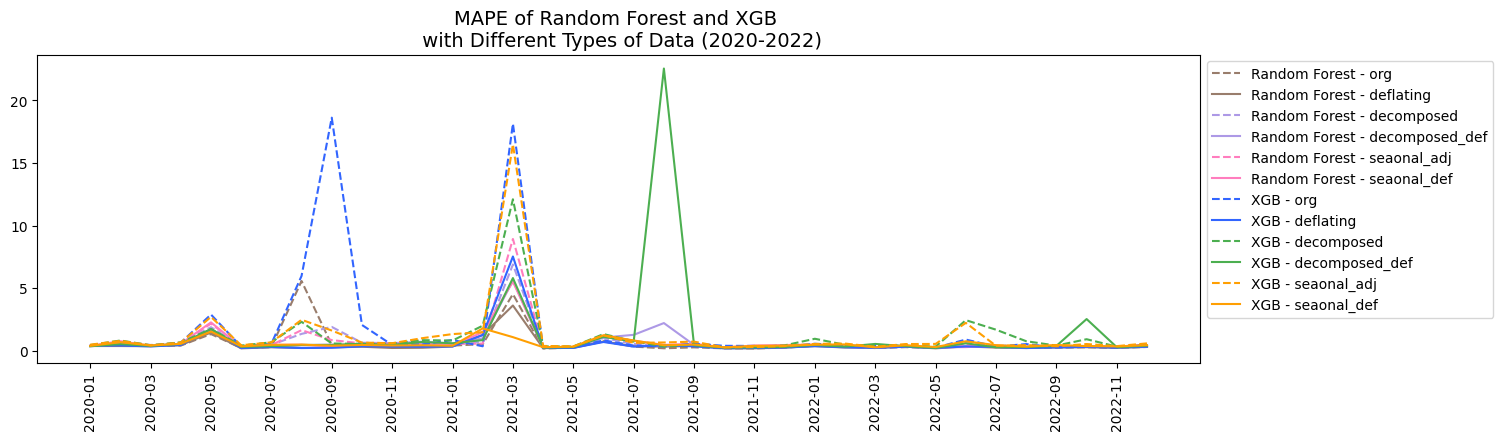

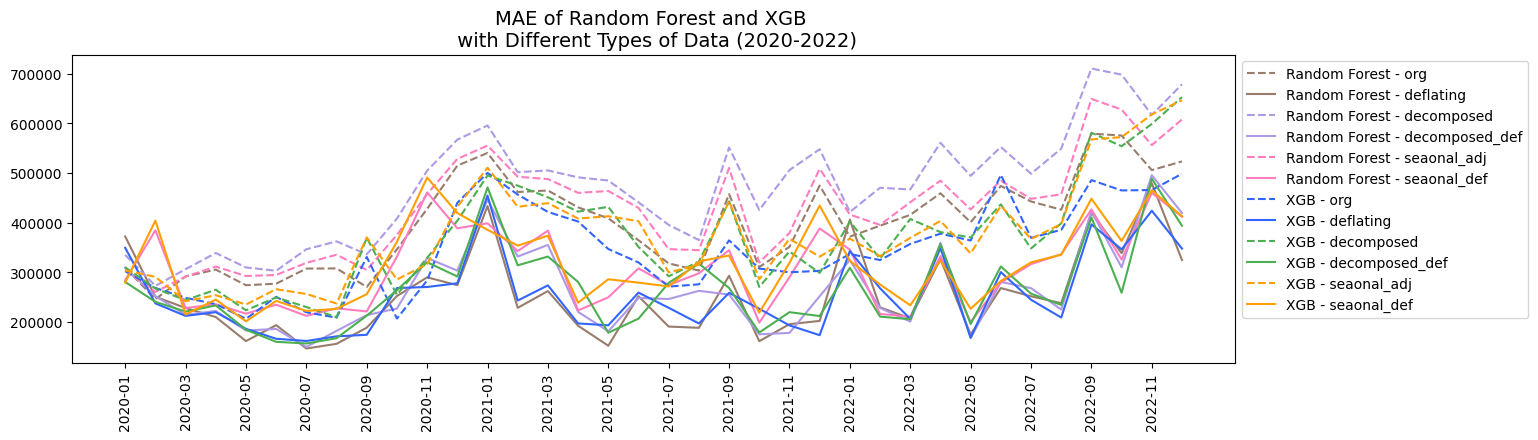

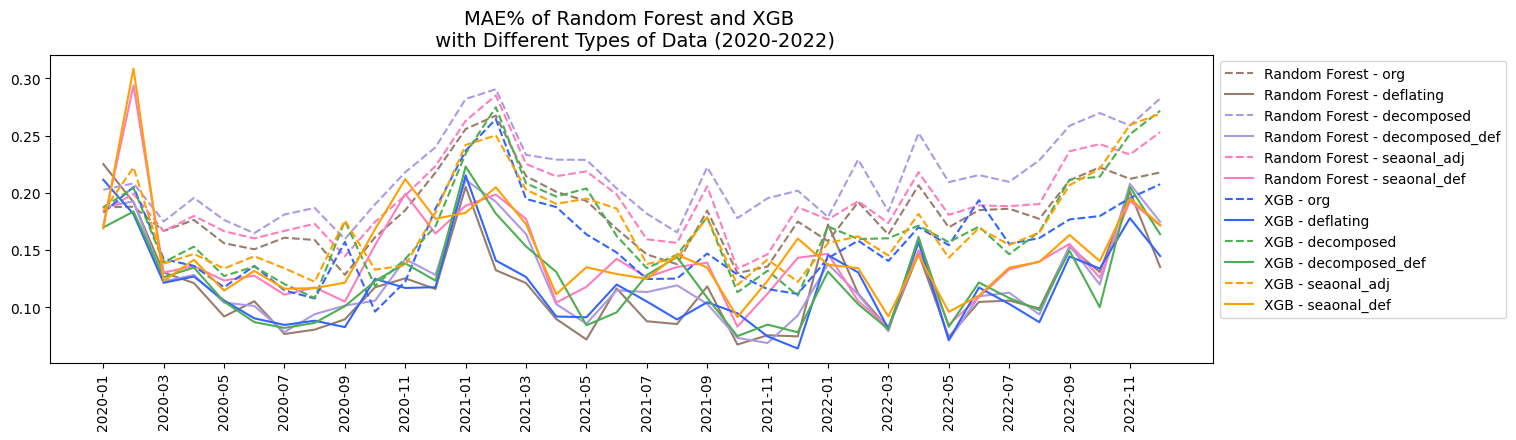

In [ ]:
plotAllScores(scores_rf, scores_xgb, start_y)

#### **8.2.2 分模型畫圖**

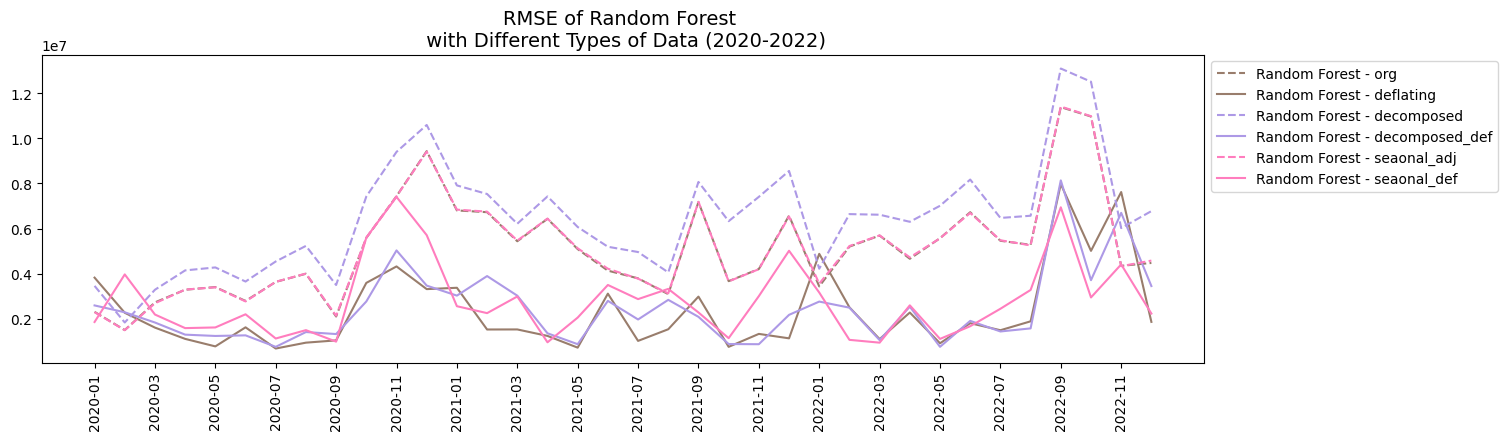

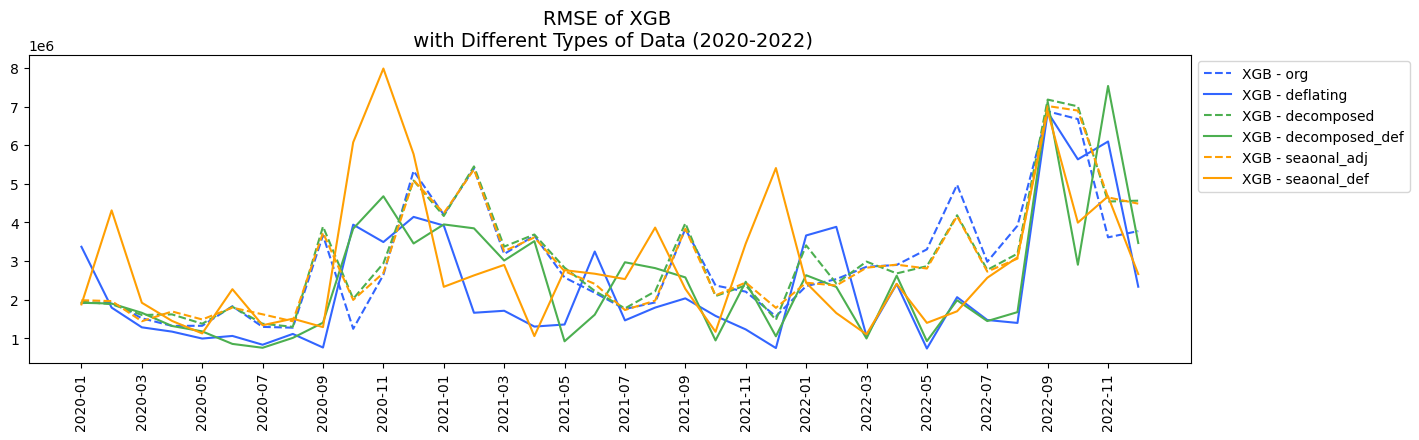

In [ ]:
# RMSE
compareModelScore(scores_rf, scores_xgb, 'RMSE', start_y)  

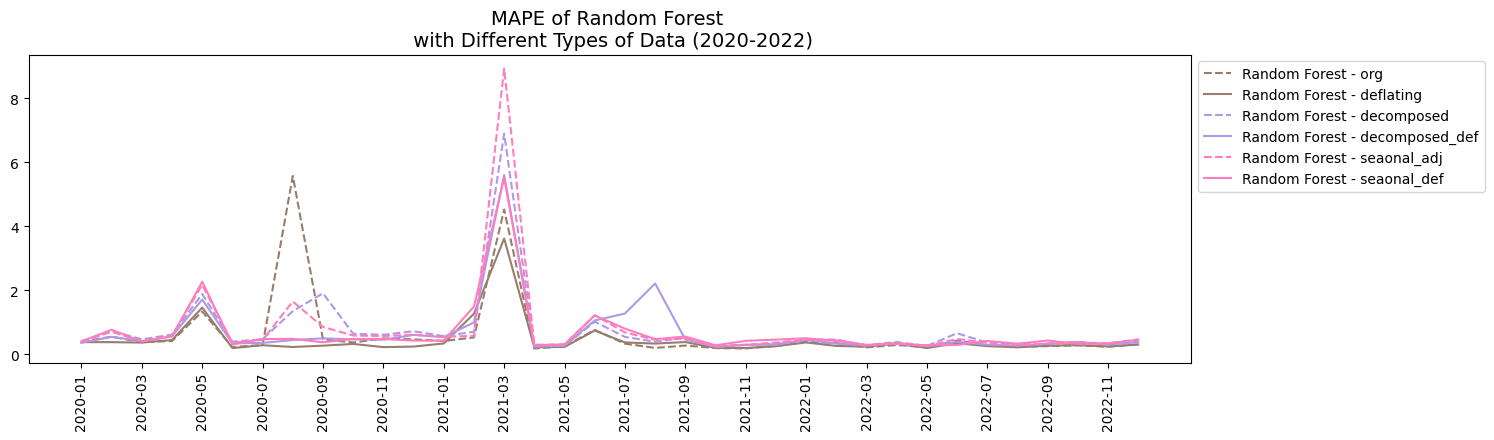

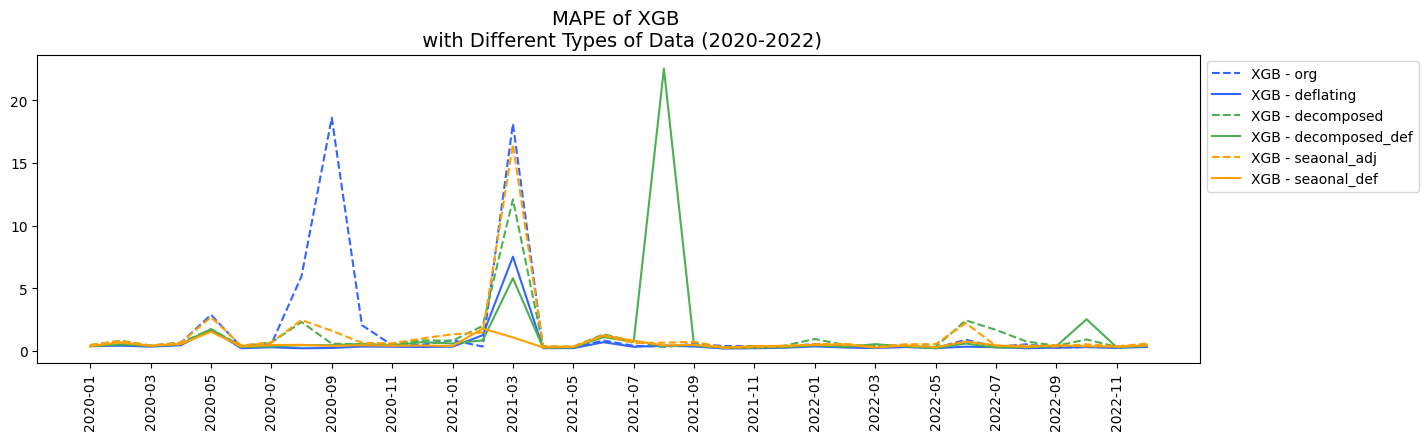

In [ ]:
# MAPE
compareModelScore(scores_rf, scores_xgb, 'MAPE', start_y)  

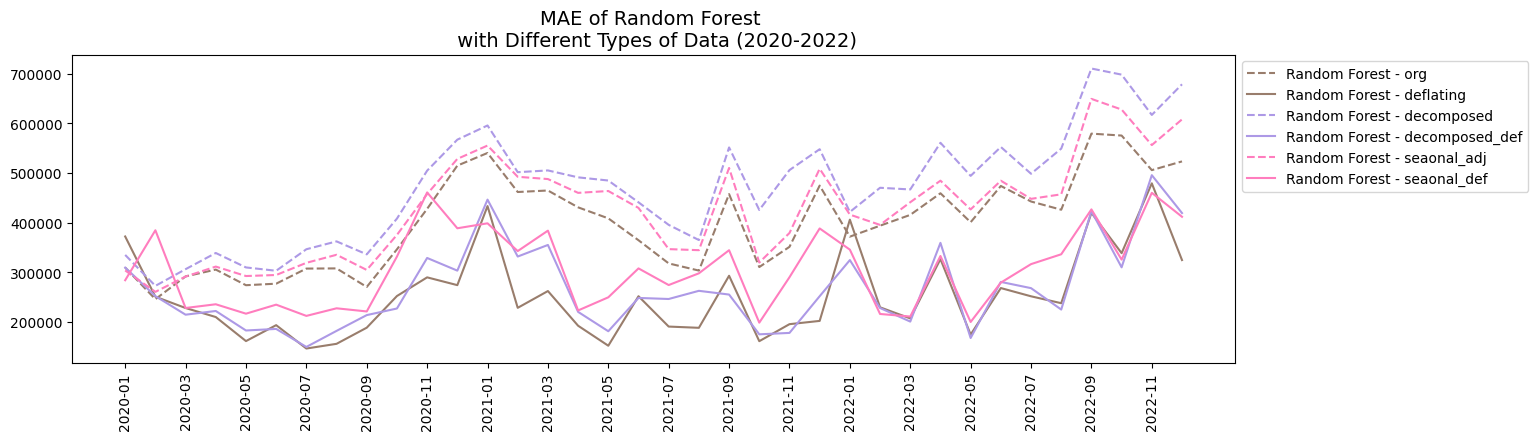

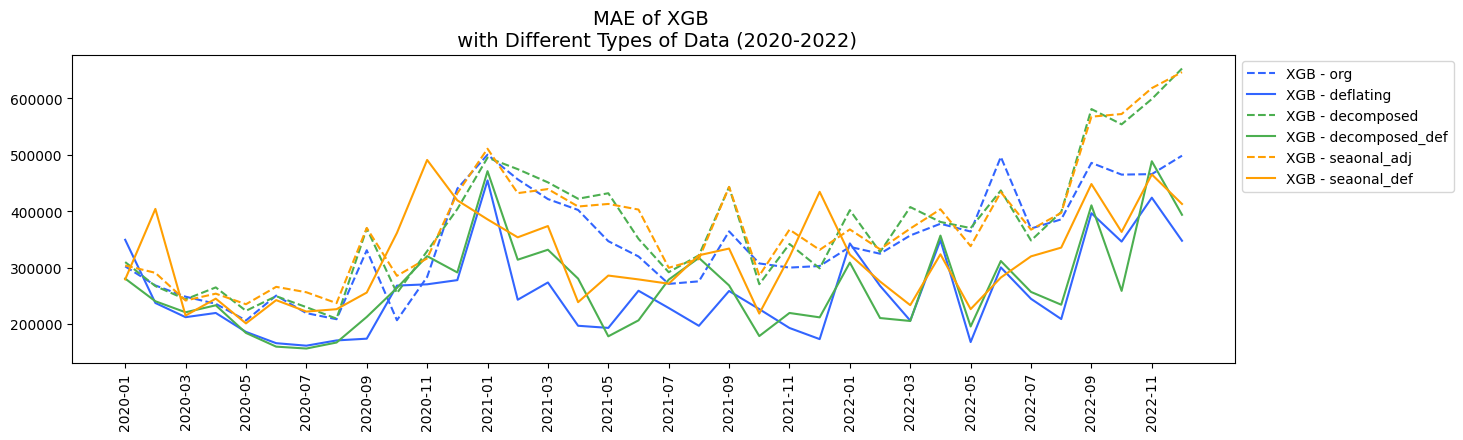

In [ ]:
# MAE
compareModelScore(scores_rf, scores_xgb, 'MAE', start_y)  

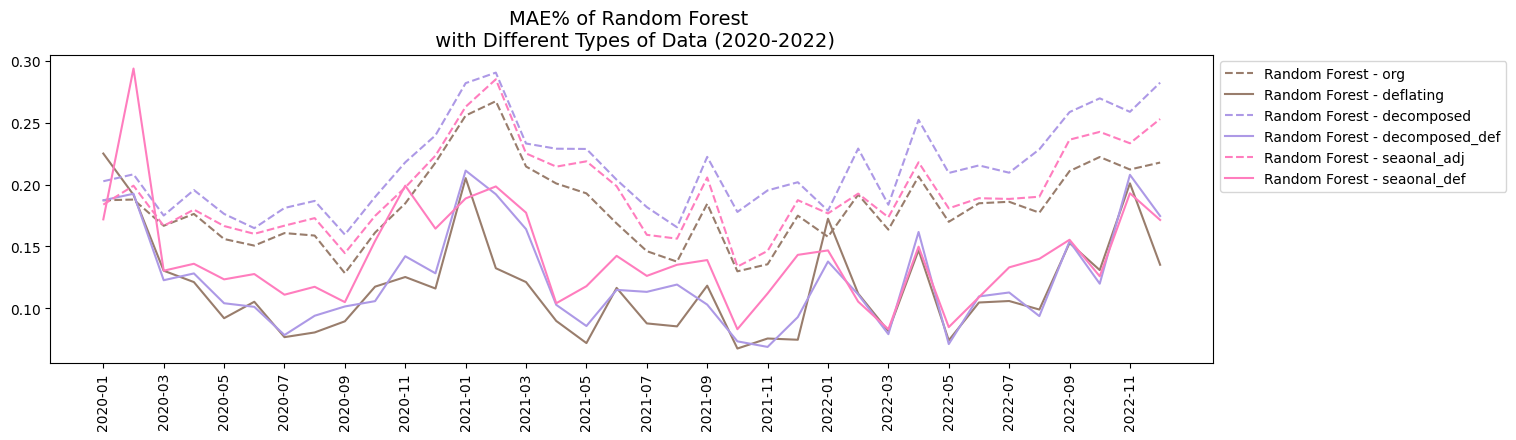

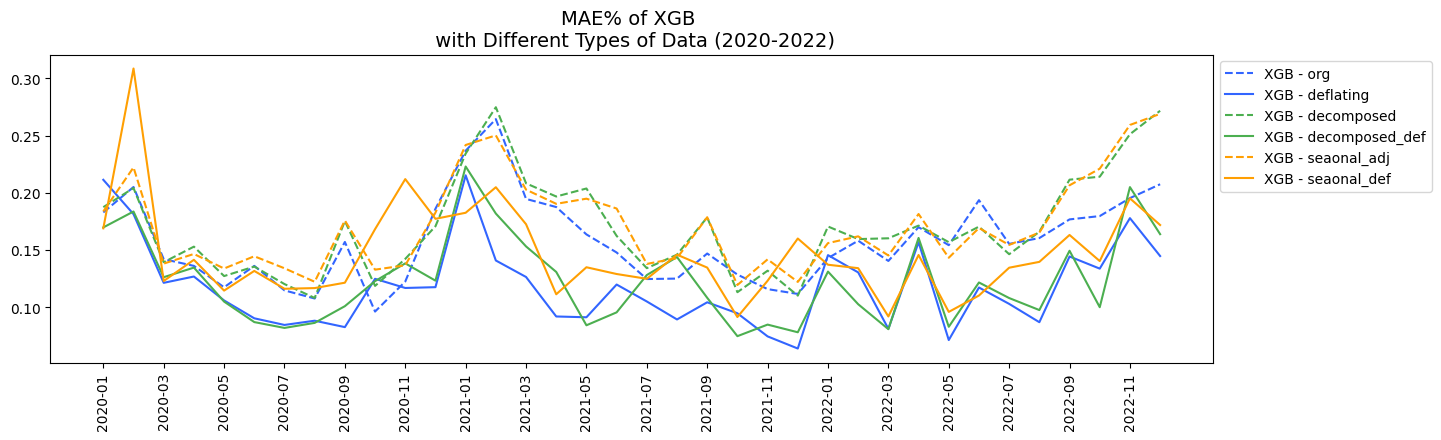

In [ ]:
# MAE%
compareModelScore(scores_rf, scores_xgb, 'MAE%', start_y)  

#### **8.2.3 Boxplot**

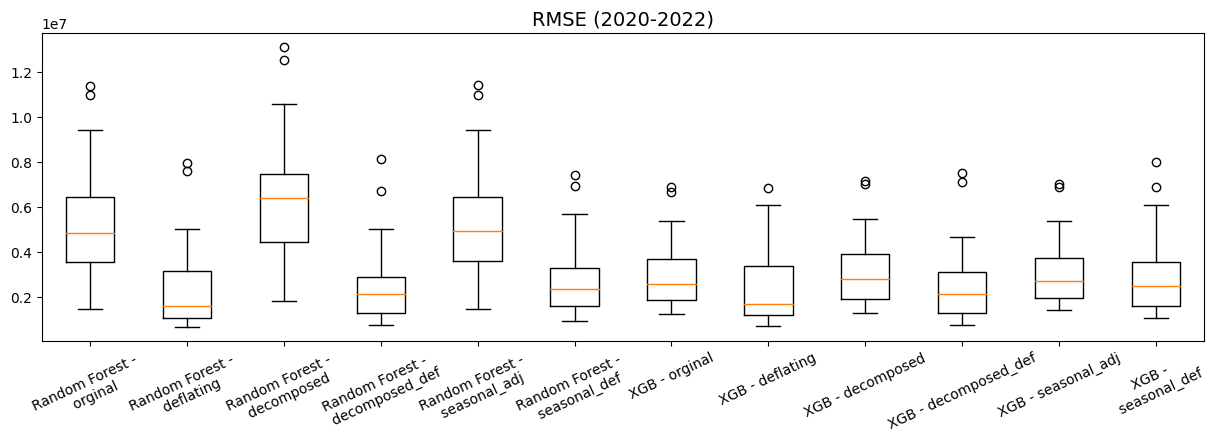

In [ ]:
# RMSE
scoreBoxplotV(scores_rf, scores_xgb, 'RMSE', start_y)  

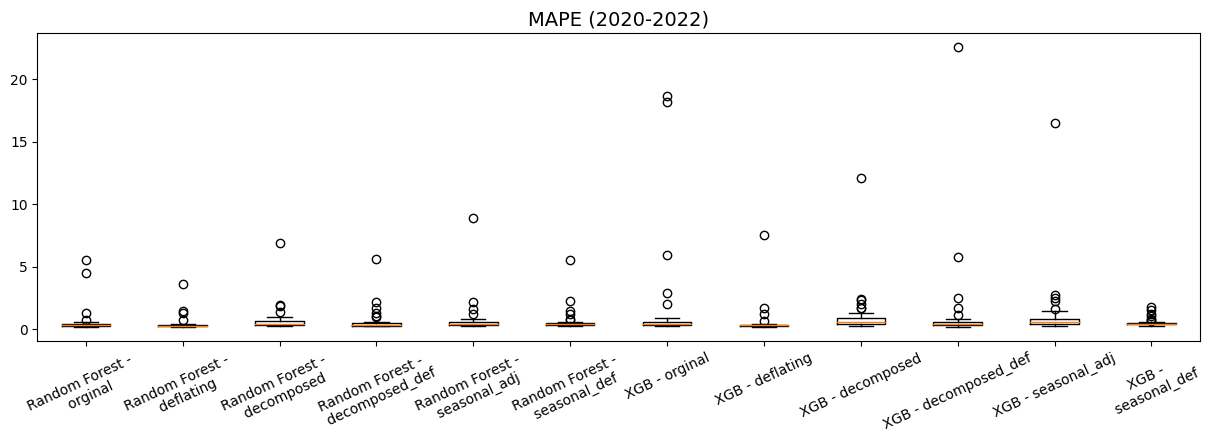

In [ ]:
# MAPE
scoreBoxplotV(scores_rf, scores_xgb, 'MAPE', start_y)  

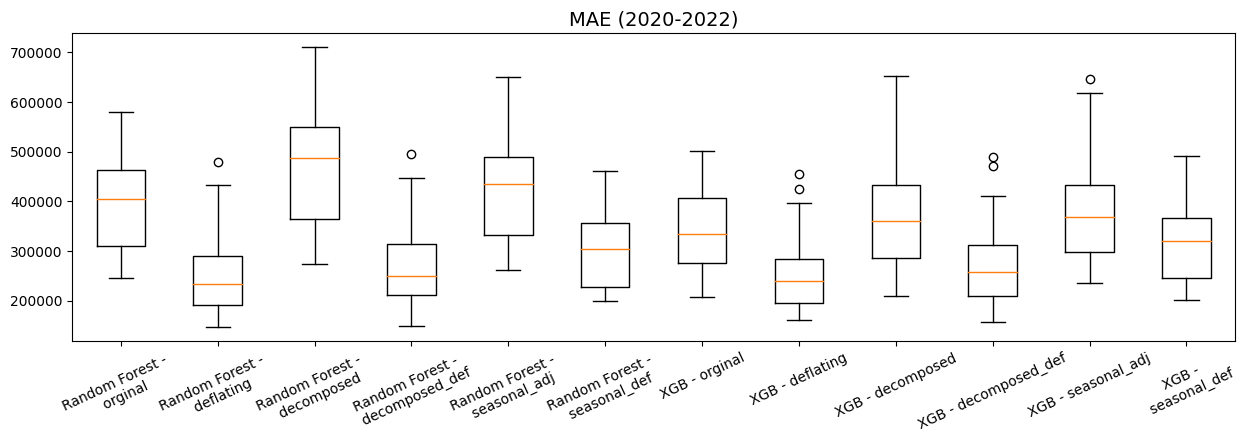

In [ ]:
# MAE
scoreBoxplotV(scores_rf, scores_xgb, 'MAE', start_y)  

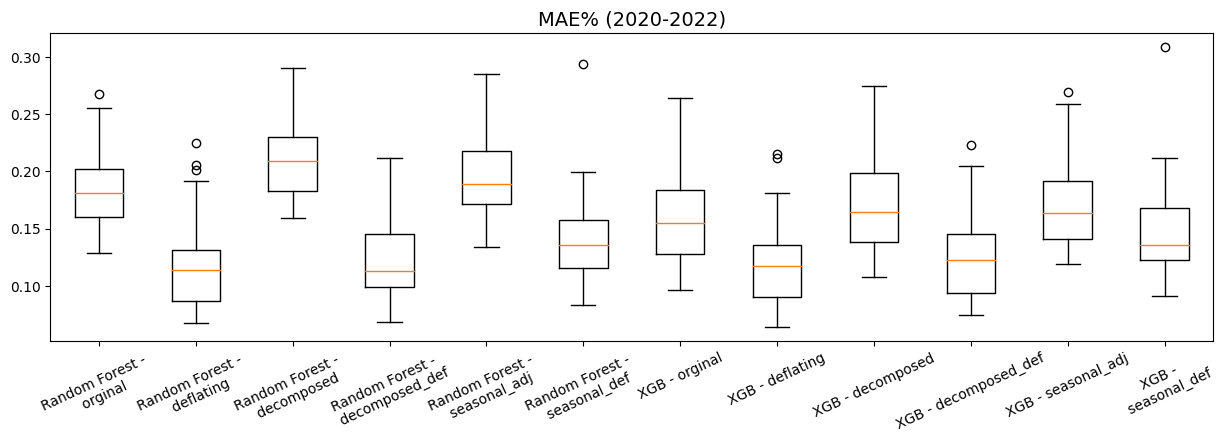

In [ ]:
# MAE%
scoreBoxplotV(scores_rf, scores_xgb, 'MAE%', start_y)  

### **8.3 Feature Importance**

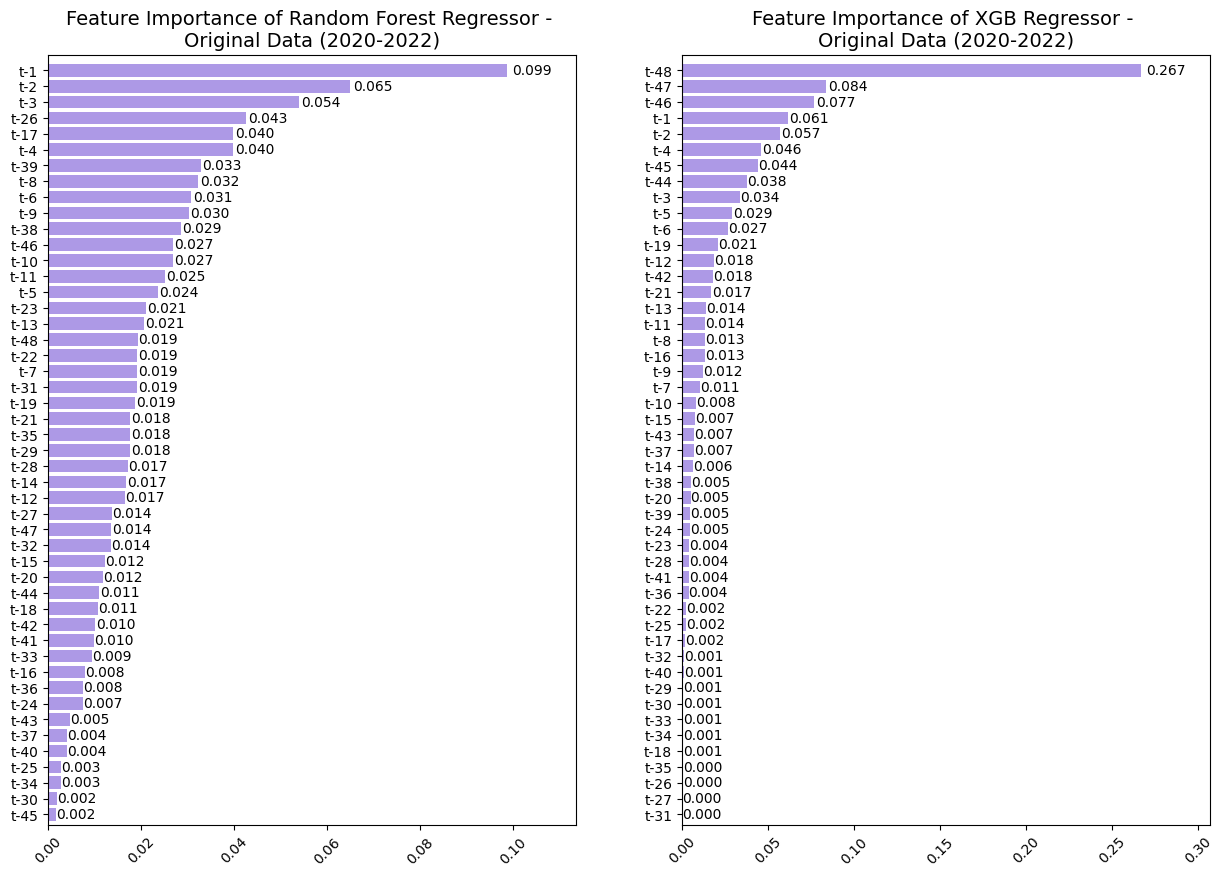

In [ ]:
plotFeatureImportance(feature_importance_rf['org']['org'], feature_importance_xgb['org']['org'], 'org', start_y, 48)

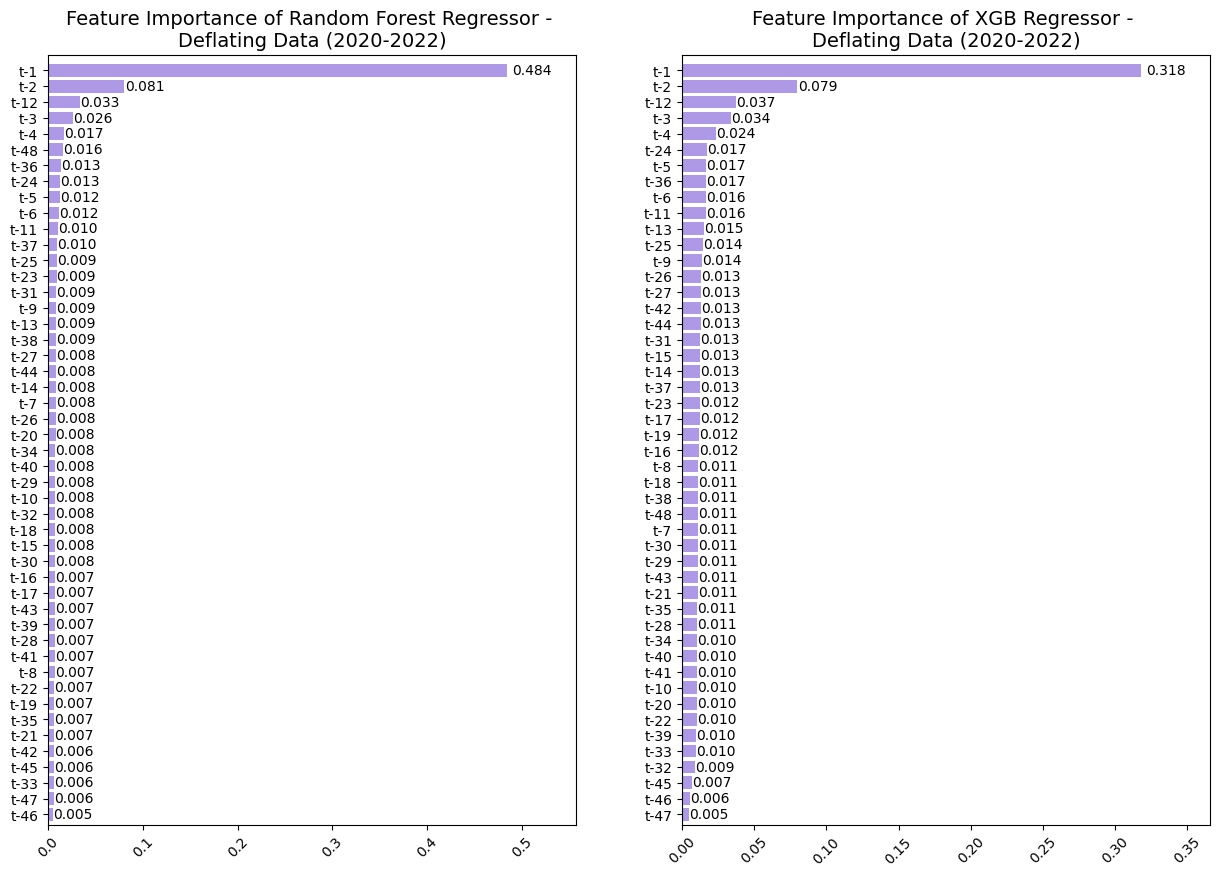

In [ ]:
plotFeatureImportance(feature_importance_rf['def']['org'], feature_importance_xgb['def']['org'], 'def', start_y, 48)

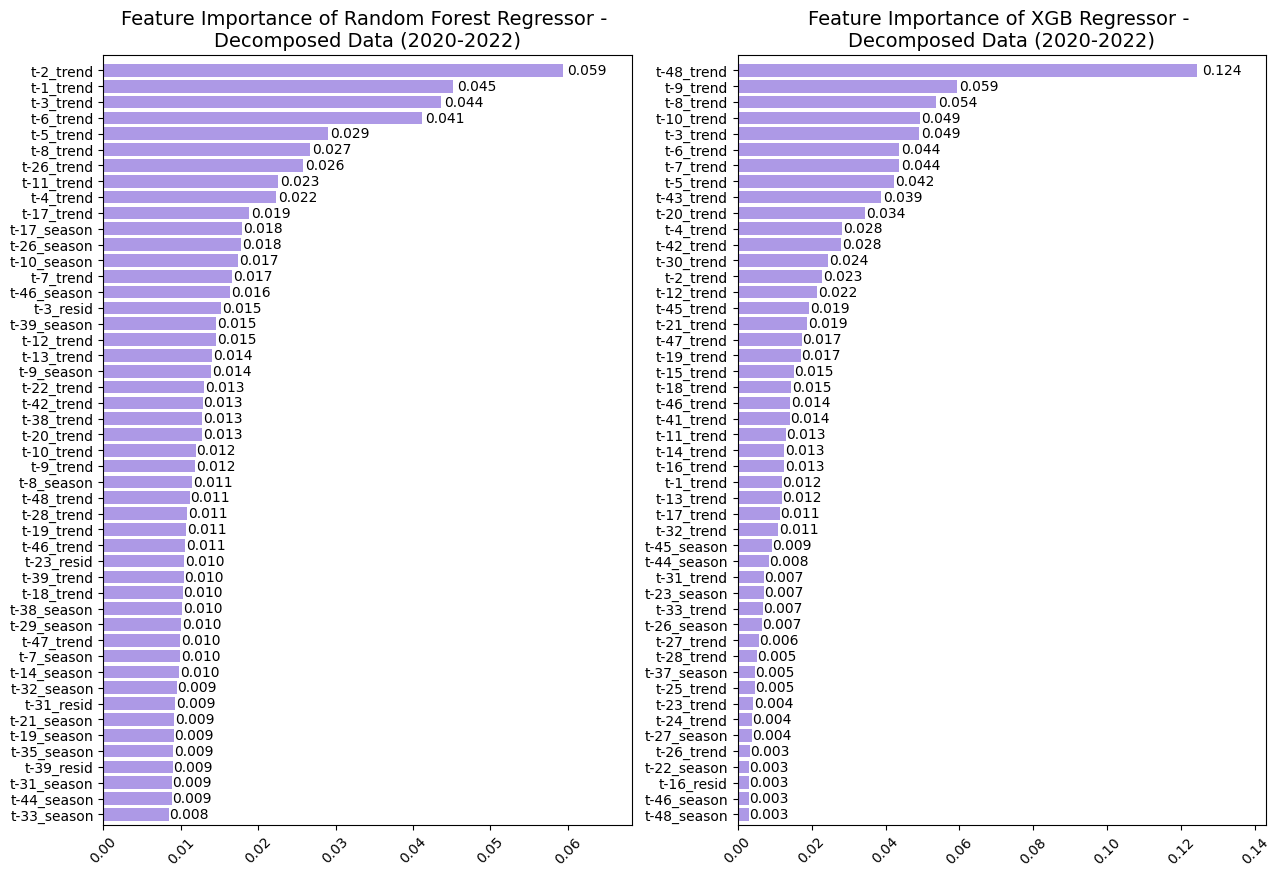

In [ ]:
plotFeatureImportance(feature_importance_rf['org']['dec'], feature_importance_xgb['org']['dec'], 'dec', start_y, 48)

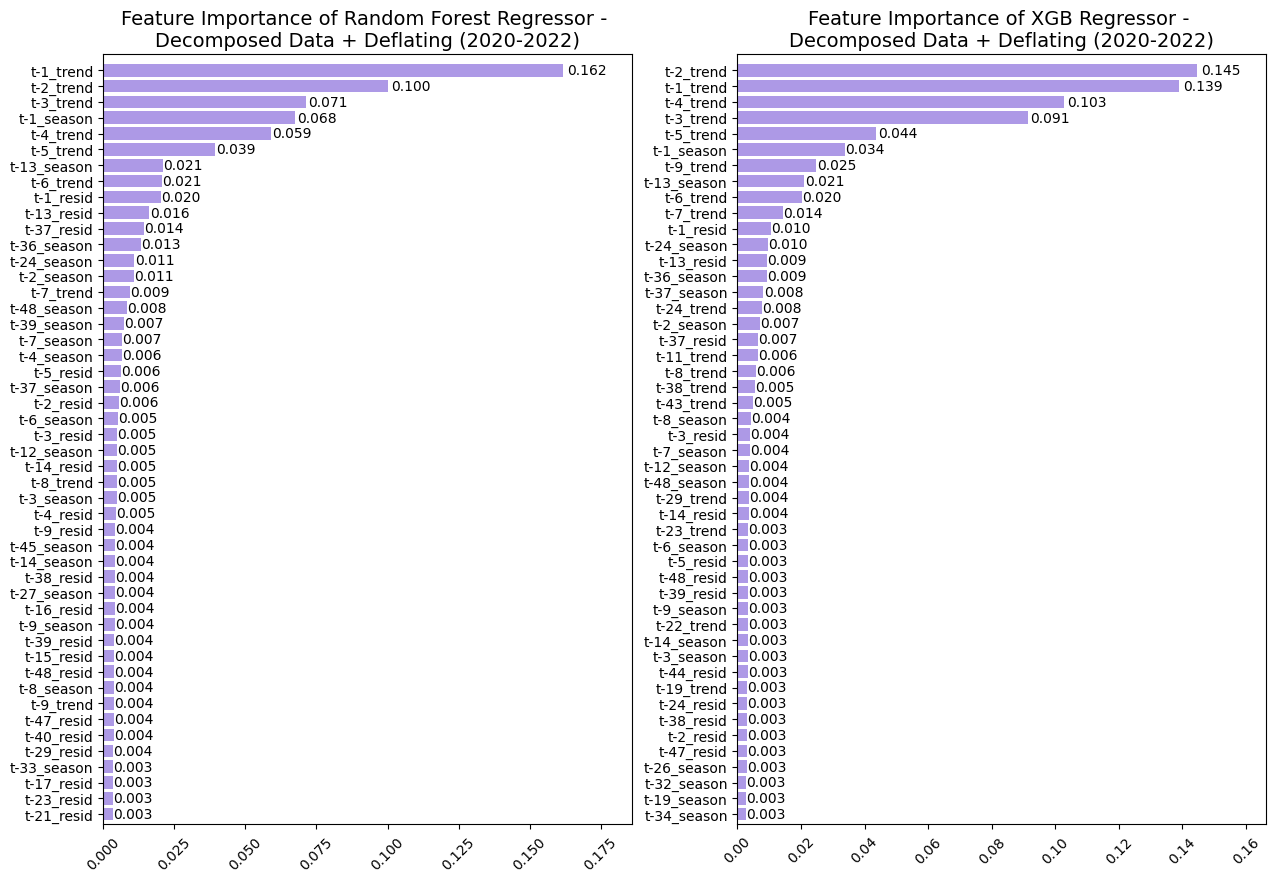

In [ ]:
plotFeatureImportance(feature_importance_rf['def']['dec'], feature_importance_xgb['def']['dec'], 'dec_def', start_y, 48)

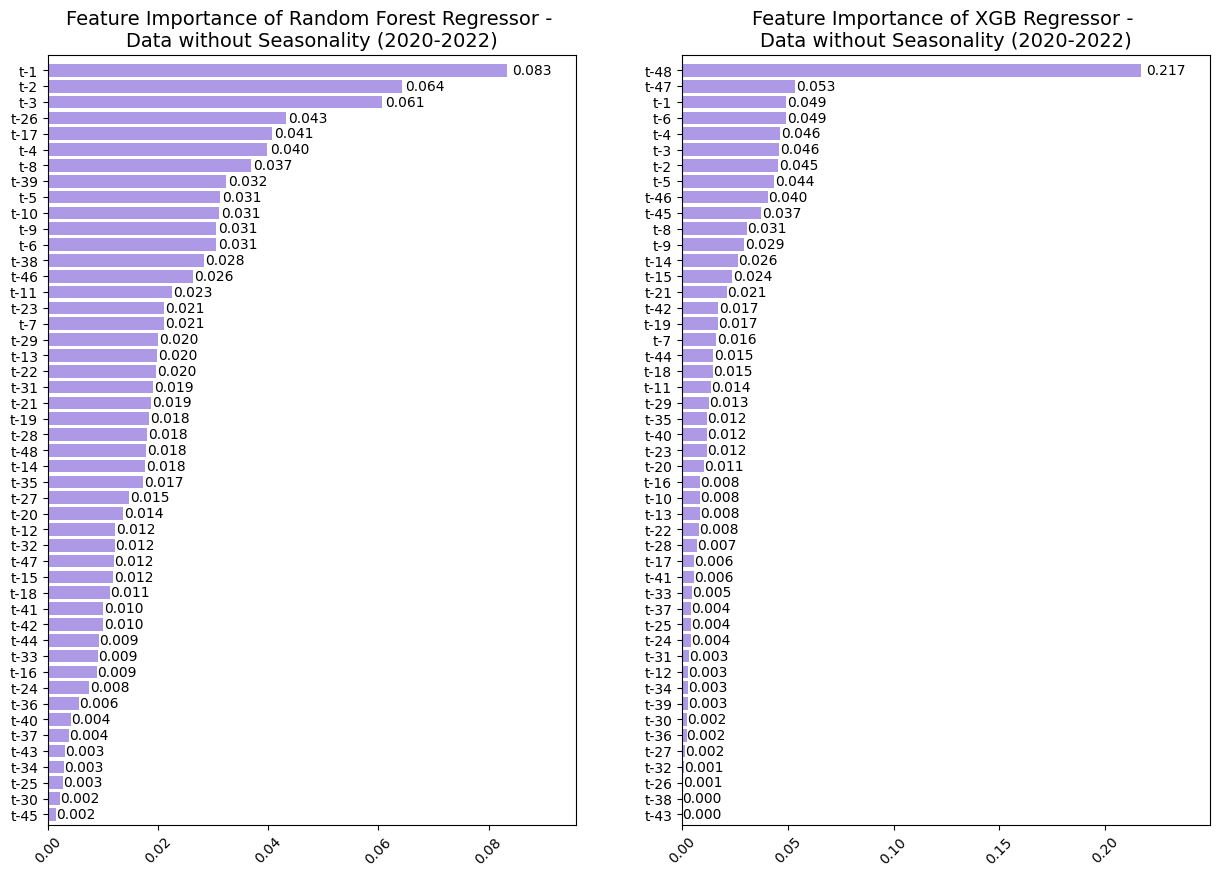

In [ ]:
plotFeatureImportance(feature_importance_rf['org']['season'], feature_importance_xgb['org']['season'], 'season', start_y, 48)

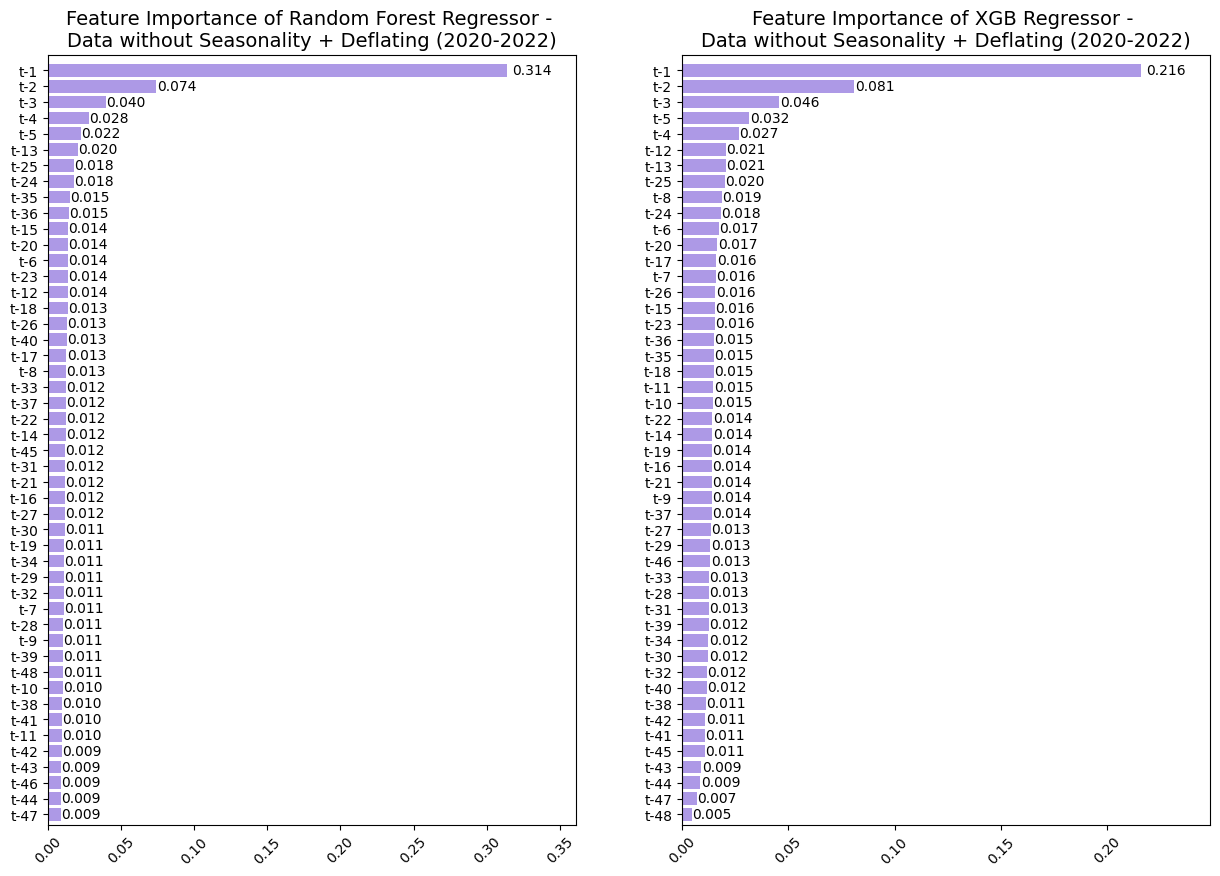

In [ ]:
plotFeatureImportance(feature_importance_rf['def']['season'], feature_importance_xgb['def']['season'], 'season_def', start_y, 48)

## **9. Best and Worst Model**

2023.04.05

In [ ]:
bw = BestWorstModel(scores_rf, scores_xgb)

### **9.1 各模型組合中，預測最好和最差的月份**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|2|6|4|2 (fixed)|2x6x4x2 = 96|

#### **9.1.1 RMSE**

In [ ]:
best_rmse, worst_rmse = bw.findBestWorstForAll('RMSE')

##### **最佳月份**

In [ ]:
best_rmse

modelName    dataType scoreType min_month  min_score
0   Random Forest         org      RMSE   2020-02  1489037.0
4   Random Forest         def      RMSE   2020-07   669454.0
8   Random Forest         dec      RMSE   2020-02  1825518.0
12  Random Forest     dec_def      RMSE   2020-07   744770.0
16  Random Forest      season      RMSE   2020-02  1484591.0
20  Random Forest  season_def      RMSE   2022-03   930111.0
0             XGB         org      RMSE   2020-10  1242925.0
4             XGB         def      RMSE   2022-05   732436.0
8             XGB         dec      RMSE   2020-08  1294712.0
12            XGB     dec_def      RMSE   2020-07   751958.0
16            XGB      season      RMSE   2020-08  1437138.0
20            XGB  season_def      RMSE   2021-04  1054391.0

##### **最差月份**

In [ ]:
worst_rmse

modelName    dataType scoreType max_month   max_score
0   Random Forest         org      RMSE   2022-09  11391017.0
4   Random Forest         def      RMSE   2022-09   7973844.0
8   Random Forest         dec      RMSE   2022-09  13105076.0
12  Random Forest     dec_def      RMSE   2022-09   8137044.0
16  Random Forest      season      RMSE   2022-09  11416187.0
20  Random Forest  season_def      RMSE   2020-11   7404033.0
0             XGB         org      RMSE   2022-09   6875248.0
4             XGB         def      RMSE   2022-09   6853604.0
8             XGB         dec      RMSE   2022-09   7179559.0
12            XGB     dec_def      RMSE   2022-11   7532765.0
16            XGB      season      RMSE   2022-09   7012258.0
20            XGB  season_def      RMSE   2020-11   7983930.0

#### **9.1.2 MAPE**

In [ ]:
best_mape, worst_mape = bw.findBestWorstForAll('MAPE')

##### **最佳月份**

In [ ]:
best_mape

modelName    dataType scoreType min_month  min_score
3   Random Forest         org      MAPE   2021-04     0.1799
7   Random Forest         def      MAPE   2020-06     0.1932
11  Random Forest         dec      MAPE   2021-04     0.2527
15  Random Forest     dec_def      MAPE   2021-10     0.2320
19  Random Forest      season      MAPE   2021-10     0.2379
23  Random Forest  season_def      MAPE   2021-10     0.2803
3             XGB         org      MAPE   2021-04     0.2380
7             XGB         def      MAPE   2021-10     0.1983
11            XGB         dec      MAPE   2021-10     0.2962
15            XGB     dec_def      MAPE   2022-05     0.2270
19            XGB      season      MAPE   2021-10     0.2735
23            XGB  season_def      MAPE   2021-10     0.2732

##### **最差月份**

In [ ]:
worst_mape

modelName    dataType scoreType max_month  max_score
3   Random Forest         org      MAPE   2020-08     5.5732
7   Random Forest         def      MAPE   2021-03     3.6161
11  Random Forest         dec      MAPE   2021-03     6.8949
15  Random Forest     dec_def      MAPE   2021-03     5.6053
19  Random Forest      season      MAPE   2021-03     8.9286
23  Random Forest  season_def      MAPE   2021-03     5.5209
3             XGB         org      MAPE   2020-09    18.6158
7             XGB         def      MAPE   2021-03     7.5294
11            XGB         dec      MAPE   2021-03    12.1006
15            XGB     dec_def      MAPE   2021-08    22.5418
19            XGB      season      MAPE   2021-03    16.4945
23            XGB  season_def      MAPE   2021-02     1.7863

#### **9.1.3 MAE**

In [ ]:
best_mae, worst_mae = bw.findBestWorstForAll('MAE')

##### **最佳月份**

In [ ]:
best_mae

modelName    dataType scoreType min_month  min_score
1   Random Forest         org       MAE   2020-02   245976.0
5   Random Forest         def       MAE   2020-07   146703.0
9   Random Forest         dec       MAE   2020-02   272744.0
13  Random Forest     dec_def       MAE   2020-07   149898.0
17  Random Forest      season       MAE   2020-02   260716.0
21  Random Forest  season_def       MAE   2021-10   198764.0
1             XGB         org       MAE   2020-05   206520.0
5             XGB         def       MAE   2020-07   161908.0
9             XGB         dec       MAE   2020-08   209760.0
13            XGB     dec_def       MAE   2020-07   156886.0
17            XGB      season       MAE   2020-05   235318.0
21            XGB  season_def       MAE   2020-05   201374.0

##### **最差月份**

In [ ]:
worst_mae

modelName    dataType scoreType max_month  max_score
1   Random Forest         org       MAE   2022-09   579078.0
5   Random Forest         def       MAE   2022-11   479065.0
9   Random Forest         dec       MAE   2022-09   710079.0
13  Random Forest     dec_def       MAE   2022-11   495530.0
17  Random Forest      season       MAE   2022-09   648991.0
21  Random Forest  season_def       MAE   2020-11   460793.0
1             XGB         org       MAE   2021-01   500086.0
5             XGB         def       MAE   2021-01   454541.0
9             XGB         dec       MAE   2022-12   652608.0
13            XGB     dec_def       MAE   2022-11   488424.0
17            XGB      season       MAE   2022-12   646178.0
21            XGB  season_def       MAE   2020-11   490761.0

#### **9.1.3 MAE%**

In [ ]:
best_mae_p, worst_mae_p = bw.findBestWorstForAll('MAE%')

##### **最佳月份**

In [ ]:
best_mae_p

modelName    dataType scoreType min_month  min_score
2   Random Forest         org      MAE%   2020-09     0.1284
6   Random Forest         def      MAE%   2021-10     0.0675
10  Random Forest         dec      MAE%   2020-09     0.1596
14  Random Forest     dec_def      MAE%   2021-11     0.0688
18  Random Forest      season      MAE%   2021-10     0.1337
22  Random Forest  season_def      MAE%   2021-10     0.0831
2             XGB         org      MAE%   2020-10     0.0963
6             XGB         def      MAE%   2021-12     0.0640
10            XGB         dec      MAE%   2020-08     0.1082
14            XGB     dec_def      MAE%   2021-10     0.0748
18            XGB      season      MAE%   2021-10     0.1195
22            XGB  season_def      MAE%   2021-10     0.0915

##### **最差月份**

In [ ]:
worst_mae_p

modelName    dataType scoreType max_month  max_score
2   Random Forest         org      MAE%   2021-02     0.2674
6   Random Forest         def      MAE%   2020-01     0.2251
10  Random Forest         dec      MAE%   2021-02     0.2905
14  Random Forest     dec_def      MAE%   2021-01     0.2113
18  Random Forest      season      MAE%   2021-02     0.2851
22  Random Forest  season_def      MAE%   2020-02     0.2938
2             XGB         org      MAE%   2021-02     0.2644
6             XGB         def      MAE%   2021-01     0.2153
10            XGB         dec      MAE%   2021-02     0.2748
14            XGB     dec_def      MAE%   2021-01     0.2230
18            XGB      season      MAE%   2022-12     0.2690
22            XGB  season_def      MAE%   2020-02     0.3086

### **9.2 Random Forest 和 XGB 各自預測最好和最差的模型組合**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|2|1|4|2 (fixed)|2x1x4x2 = 16|

In [ ]:
imp_plot = BestWorstModelFeatureImportancePlot(feature_importance_rf, feature_importance_xgb, bw.best_rf, bw.worst_rf, bw.best_xgb, bw.worst_xgb, bw.best_all, bw.worst_all, start_y)
top_k = 5

#### **9.2.1 RMSE**

##### **最佳模型**

In [ ]:
# Random Forest
bw.best_rf['RMSE']

modelName dataType scoreType min_month  min_score
4  Random Forest      def      RMSE   2020-07   669454.0

In [ ]:
# XGB
bw.best_xgb['RMSE']

modelName dataType scoreType min_month  min_score
4       XGB      def      RMSE   2022-05   732436.0

##### **最差模型**

In [ ]:
# Random Forest
bw.worst_rf['RMSE']

modelName dataType scoreType max_month   max_score
8  Random Forest      dec      RMSE   2022-09  13105076.0

In [ ]:
# XGB
bw.worst_xgb['RMSE']

modelName    dataType scoreType max_month  max_score
20       XGB  season_def      RMSE   2020-11  7983930.0

##### **Feature Importance**



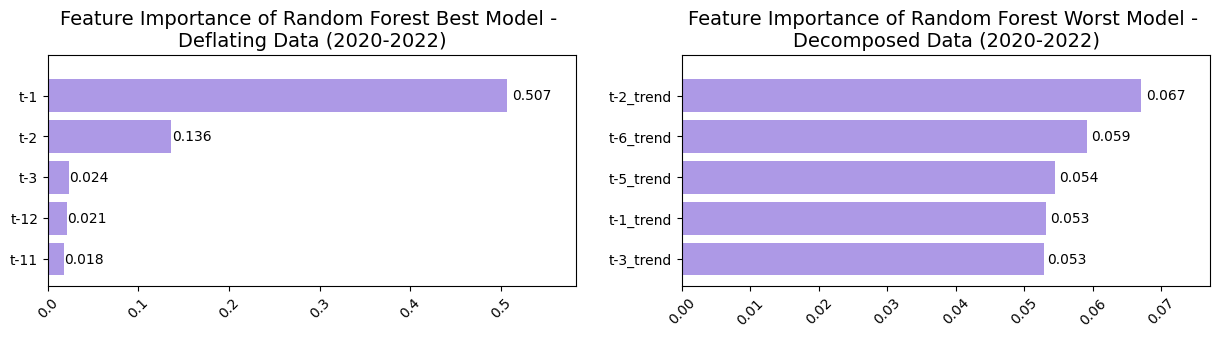

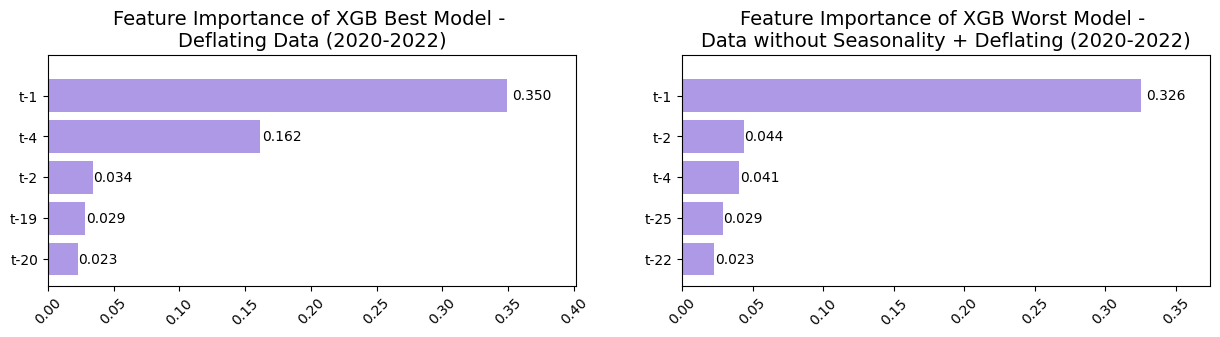

In [ ]:
imp_plot.plotBestWorstFeatureImportance('RMSE', top_k)

#### **9.2.2 MAPE**

##### **最佳模型**

In [ ]:
# Random Forest
bw.best_rf['MAPE']

modelName dataType scoreType min_month  min_score
3  Random Forest      org      MAPE   2021-04     0.1799

In [ ]:
# XGB
bw.best_xgb['MAPE']

modelName dataType scoreType min_month  min_score
7       XGB      def      MAPE   2021-10     0.1983

##### **最差模型**

In [ ]:
# Random Forest
bw.worst_rf['MAPE']

modelName dataType scoreType max_month  max_score
19  Random Forest   season      MAPE   2021-03     8.9286

In [ ]:
# XGB
bw.worst_xgb['MAPE']

modelName dataType scoreType max_month  max_score
15       XGB  dec_def      MAPE   2021-08    22.5418

##### **Feature Importance**



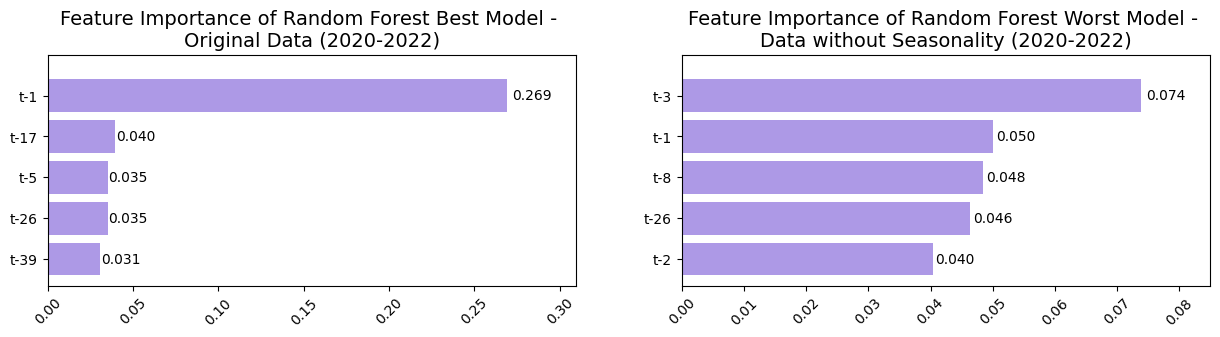

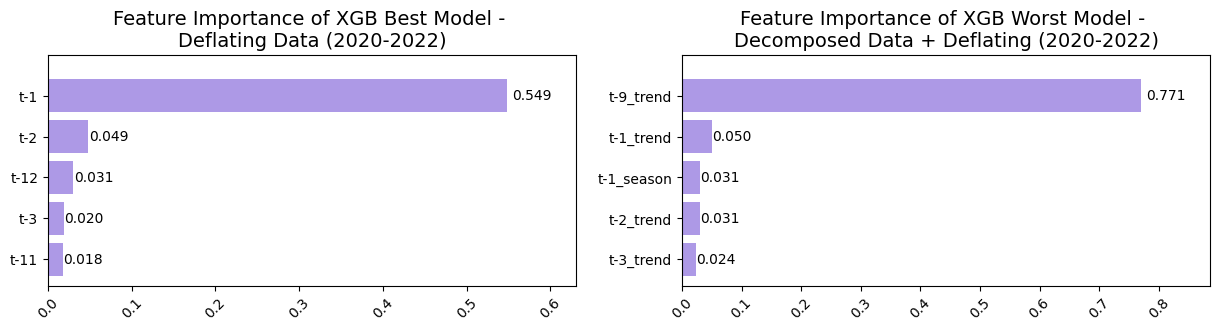

In [ ]:
imp_plot.plotBestWorstFeatureImportance('MAPE', top_k)

#### **9.2.3 MAE**

##### **最佳模型**

In [ ]:
# Random Forest
bw.best_rf['MAE']

modelName dataType scoreType min_month  min_score
5  Random Forest      def       MAE   2020-07   146703.0

In [ ]:
# XGB
bw.best_xgb['MAE']

modelName dataType scoreType min_month  min_score
13       XGB  dec_def       MAE   2020-07   156886.0

##### **最差模型**

In [ ]:
# Random Forest
bw.worst_rf['MAE']

modelName dataType scoreType max_month  max_score
9  Random Forest      dec       MAE   2022-09   710079.0

In [ ]:
# XGB
bw.worst_xgb['MAE']

modelName dataType scoreType max_month  max_score
9       XGB      dec       MAE   2022-12   652608.0

##### **Feature Importance**



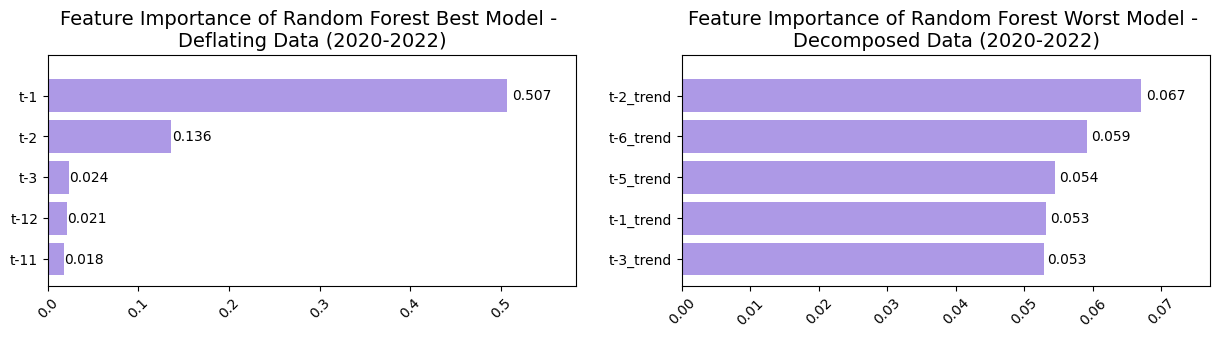

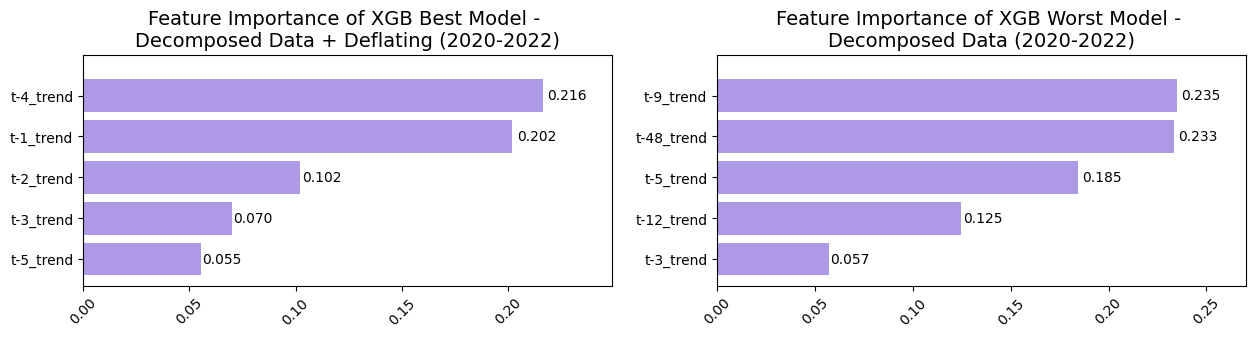

In [ ]:
imp_plot.plotBestWorstFeatureImportance('MAE', top_k)

#### **9.2.4 MAE%**

##### **最佳模型**

In [ ]:
# Random Forest
bw.best_rf['MAE%']

modelName dataType scoreType min_month  min_score
6  Random Forest      def      MAE%   2021-10     0.0675

In [ ]:
# XGB
bw.best_xgb['MAE%']

modelName dataType scoreType min_month  min_score
6       XGB      def      MAE%   2021-12      0.064

##### **最差模型**

In [ ]:
# Random Forest
bw.worst_rf['MAE%']

modelName    dataType scoreType max_month  max_score
22  Random Forest  season_def      MAE%   2020-02     0.2938

In [ ]:
# XGB
bw.worst_xgb['MAE%']

modelName    dataType scoreType max_month  max_score
22       XGB  season_def      MAE%   2020-02     0.3086

##### **Feature Importance**



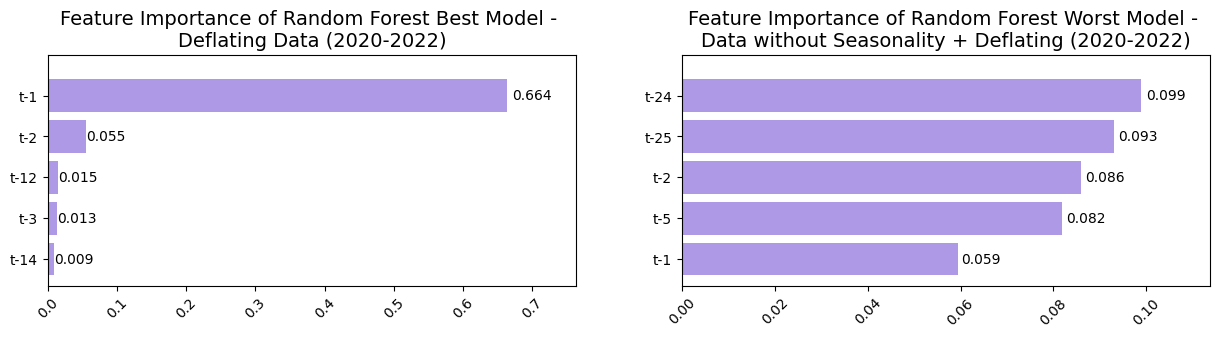

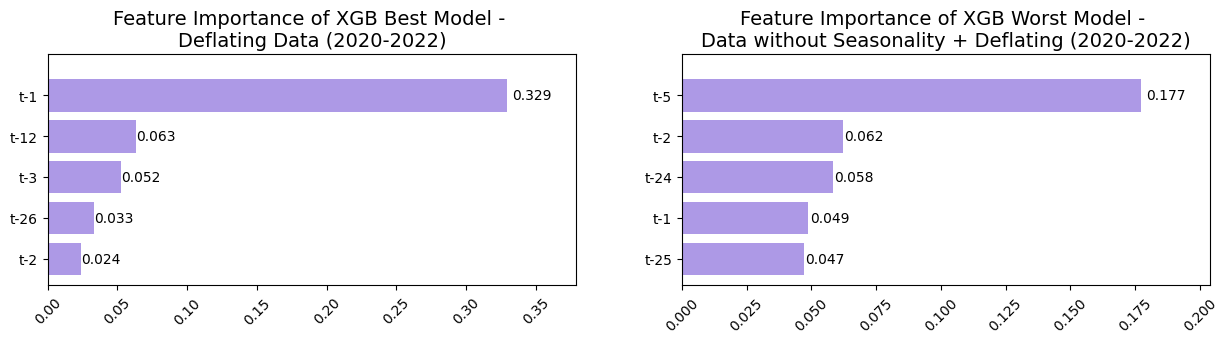

In [ ]:
imp_plot.plotBestWorstFeatureImportance('MAE%', top_k)

### **9.3 所有模型組合中，預測最好和最差的模型組合**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|1|1|4|2 (fixed)|1x1x4x2 = 8|


#### **9.3.1 RMSE**

##### **最佳模型**

In [ ]:
bw.best_all['RMSE']

modelName dataType scoreType min_month  min_score
4  Random Forest      def      RMSE   2020-07   669454.0

##### **最差模型**

In [ ]:
bw.worst_all['RMSE']

modelName dataType scoreType max_month   max_score
8  Random Forest      dec      RMSE   2022-09  13105076.0

##### **Feature Importance**



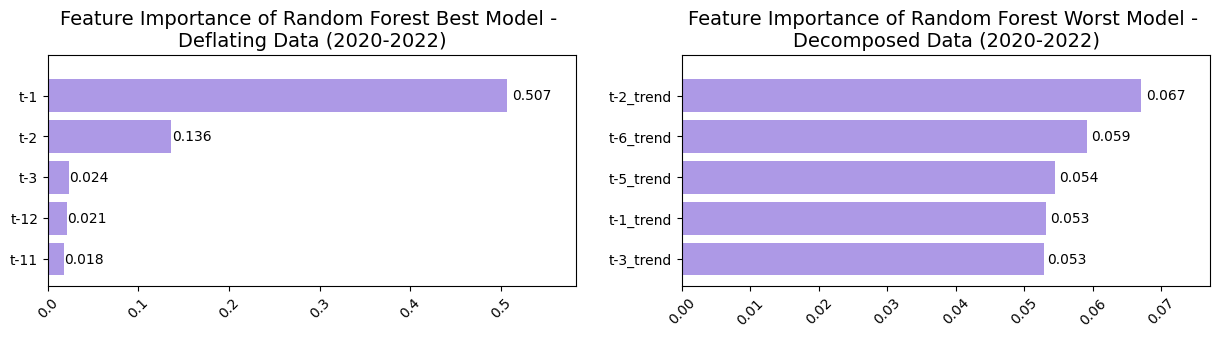

In [ ]:
imp_plot.plotBestWorstFeatureImportance('RMSE', top_k, all = True)

#### **9.3.2 MAPE**

##### **最佳模型**

In [ ]:
bw.best_all['MAPE']

modelName dataType scoreType min_month  min_score
3  Random Forest      org      MAPE   2021-04     0.1799

##### **最差模型**

In [ ]:
bw.worst_all['MAPE']

modelName dataType scoreType max_month  max_score
15       XGB  dec_def      MAPE   2021-08    22.5418

##### **Feature Importance**



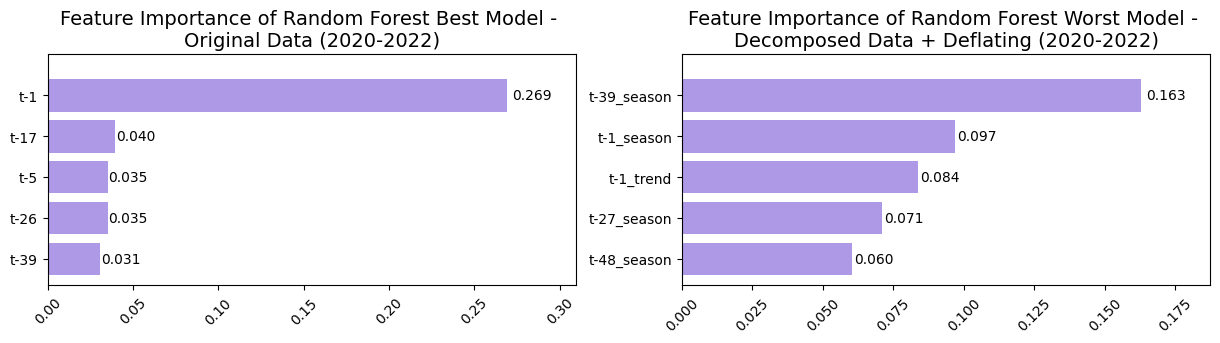

In [ ]:
imp_plot.plotBestWorstFeatureImportance('MAPE', top_k, all = True)

#### **9.3.3 MAE**

##### **最佳模型**

In [ ]:
bw.best_all['MAE']

modelName dataType scoreType min_month  min_score
5  Random Forest      def       MAE   2020-07   146703.0

##### **最差模型**

In [ ]:
bw.worst_all['MAE']

modelName dataType scoreType max_month  max_score
9  Random Forest      dec       MAE   2022-09   710079.0

##### **Feature Importance**



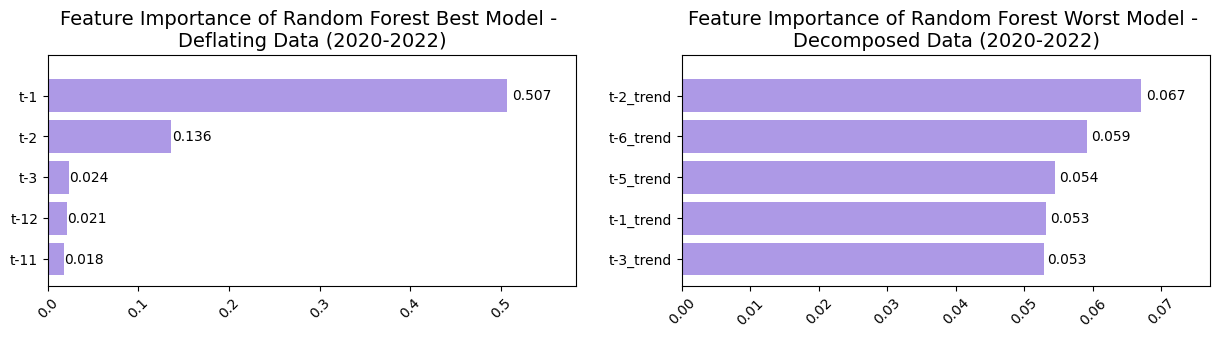

In [ ]:
imp_plot.plotBestWorstFeatureImportance('MAE', top_k, all = True)

#### **9.3.4 MAE%**

##### **最佳模型**

In [ ]:
bw.best_all['MAE%']

modelName dataType scoreType min_month  min_score
6       XGB      def      MAE%   2021-12      0.064

##### **最差模型**

In [ ]:
bw.worst_all['MAE%']

modelName    dataType scoreType max_month  max_score
22       XGB  season_def      MAE%   2020-02     0.3086

##### **Feature Importance**



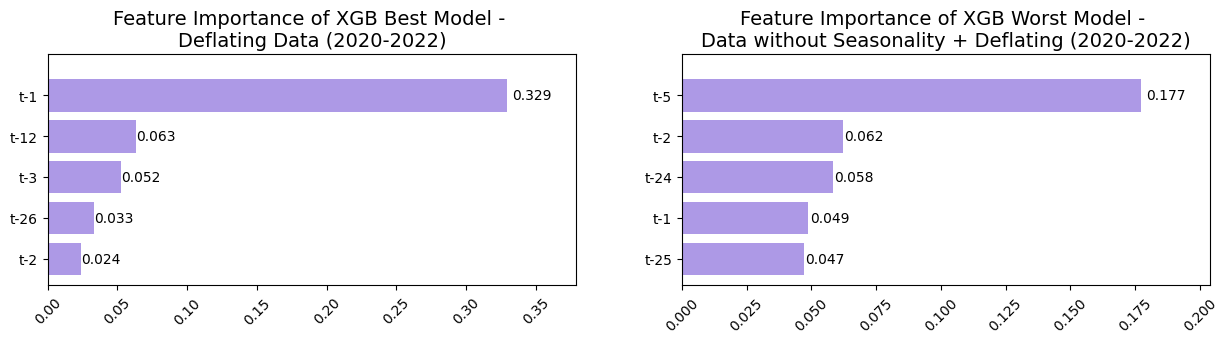

In [ ]:
imp_plot.plotBestWorstFeatureImportance('MAE%', top_k, all = True)